In [1]:
import pandas as pd 
import matplotlib.pyplot as plt   
import seaborn as sns              

Dataset = pd.read_csv("./Shark Tank US dataset_Final.csv")
print(Dataset.columns)

Index(['Season Number', 'Episode Number', 'Pitch Number', 'Startup Name',
       'Industry', 'Business Description', 'Pitchers Gender', 'Pitchers State',
       'Pitchers City', 'Entrepreneur Names', 'Company Website',
       'Multiple Entrepreneurs', 'US Viewers', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Got Deal',
       'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation',
       'Number of sharks in deal', 'Investment Amount Per Shark',
       'Equity Per Shark', 'Royalty Deal', 'Loan',
       'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymond John Investment Amount',
       'Daymond John Investment Equity', 'Kevin O Leary Investment Amount',
       'Kevin O Leary Investmen

6


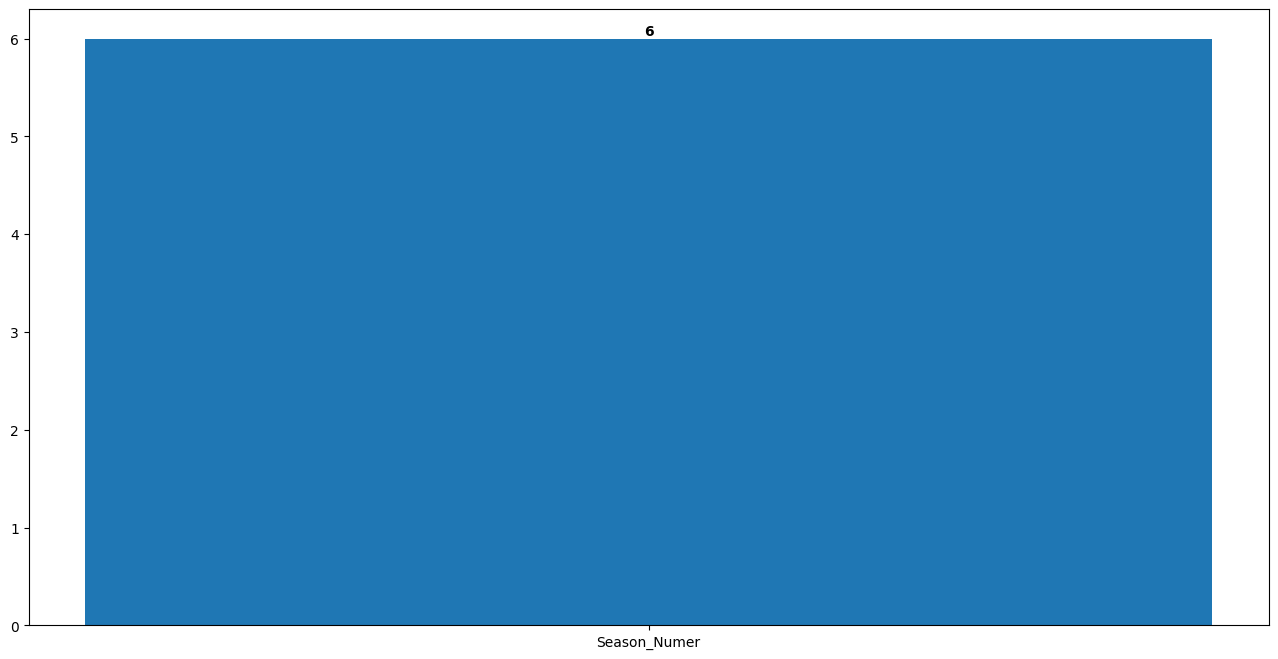

In [2]:
# Question - 1  :- Which season is having the overall highest deal in terms of the amount?

Season_With_Highest_Amount = Dataset.loc[Dataset["Total Deal Amount"].idxmax(), "Season Number"]
plt.figure(figsize = (16,8))
plt.bar(x = ["Season_Numer"] , height=[Season_With_Highest_Amount] , width=0.5)

for i, values in enumerate([Season_With_Highest_Amount]) :
    plt.text(i , values , str(values) , ha = 'center', va = 'bottom' , weight = 'bold')
plt.show()


C:\Users\online\AppData\Local\Temp\ipykernel_6604\3380326081.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_deal_episodes = Dataset.groupby("Season Number").apply(
C:\Users\online\AppData\Local\Temp\ipykernel_6604\3380326081.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", 10)


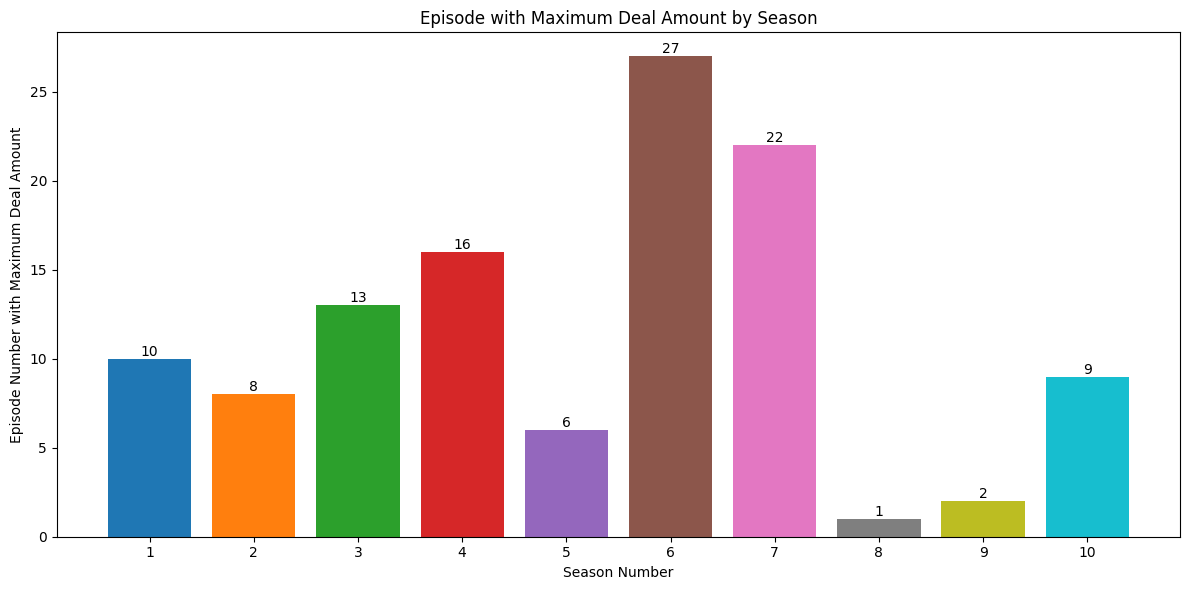

In [76]:
# Question - 2 :- Enlist episodes for each season having the highest deal in terms of the amount?

max_deal_episodes = Dataset.groupby("Season Number").apply(lambda x: x.loc[x["Total Deal Amount"].idxmax()])
colors = plt.cm.get_cmap("tab10", 10)
plt.figure(figsize=(12, 6))
bars = plt.bar(max_deal_episodes["Season Number"],max_deal_episodes["Episode Number"],color=colors(range(10)),)
plt.title("Episode with Maximum Deal Amount by Season")
plt.xlabel("Season Number")
plt.ylabel("Episode Number with Maximum Deal Amount")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom")

plt.xticks(max_deal_episodes["Season Number"])
plt.tight_layout()
plt.show()

                    Startup Name  Total Deal Amount
483                       AirCar          5000000.0
835                 MokiDoorstep          3000000.0
489                 SynDaverLabs          3000000.0
421                         Zipz          2500000.0
611                      Fizzics          2000000.0
284  TenThirtyOneHauntedHayrides          2000000.0
580                        Vengo          2000000.0
363                 RuggedManiac          1750000.0
563                      Sworkit          1500000.0
813                  BeyondSushi          1500000.0


C:\Users\online\AppData\Local\Temp\ipykernel_6604\3496700833.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", 10)


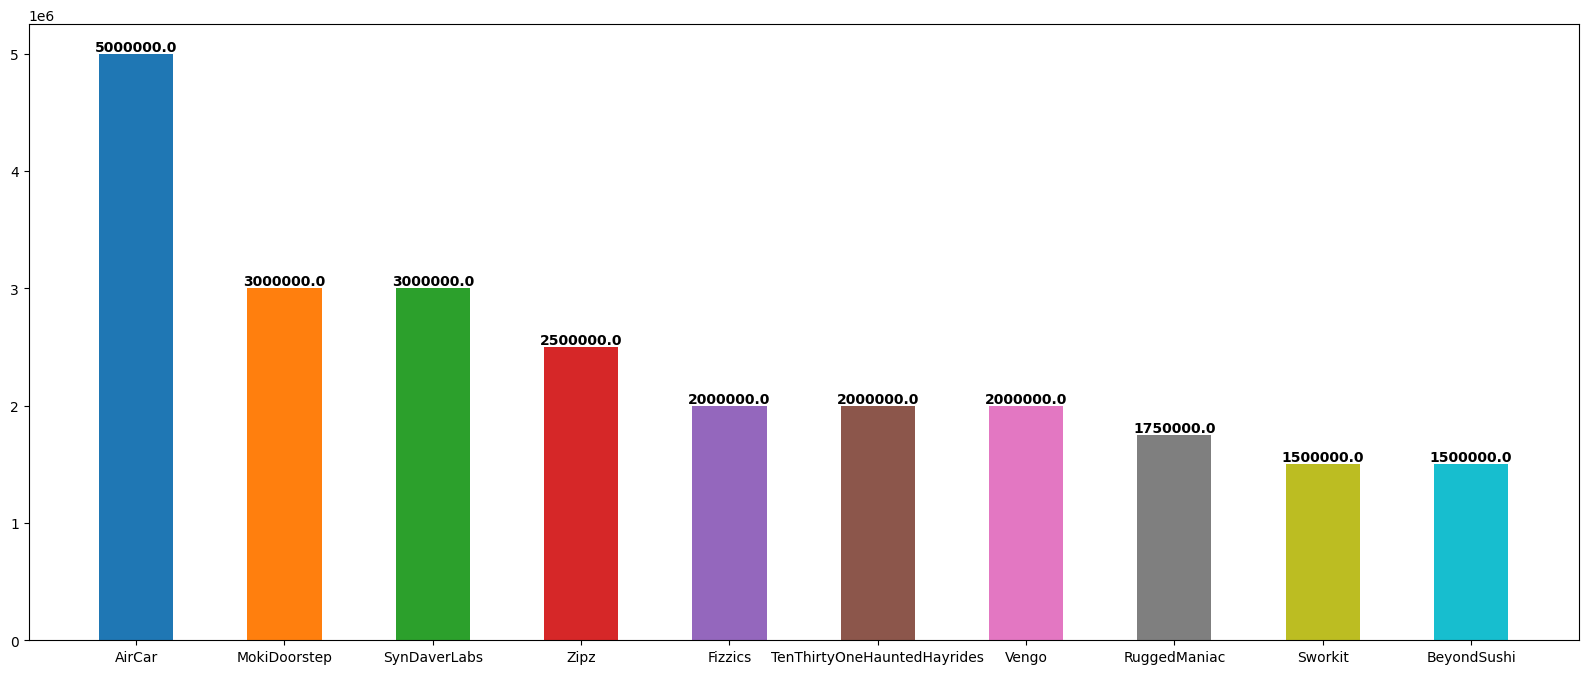

In [18]:
# Question - 3 :- Which are the top-10 deals in the shark tank?

Sorted_Deal = Dataset.sort_values(by="Total Deal Amount" , ascending=False)[:10]
Top_10_Deal = pd.DataFrame({"Startup Name" : Sorted_Deal['Startup Name'] , 'Total Deal Amount' : Sorted_Deal['Total Deal Amount']})
print(Top_10_Deal)
colors = plt.cm.get_cmap("tab10", 10)
plt.figure(figsize=(20,8))
plt.bar(x = Top_10_Deal['Startup Name'] , height=Top_10_Deal['Total Deal Amount'] , width=0.5 , color = colors(range(10)))
for i,value in enumerate(Top_10_Deal["Total Deal Amount"]) :
    plt.text(i , value , str(value) , ha = "center" , va = "bottom" , weight = "bold")
plt.show()

Index(['Total Deal Amount'], dtype='object')


C:\Users\online\AppData\Local\Temp\ipykernel_6604\2333892650.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", 3)


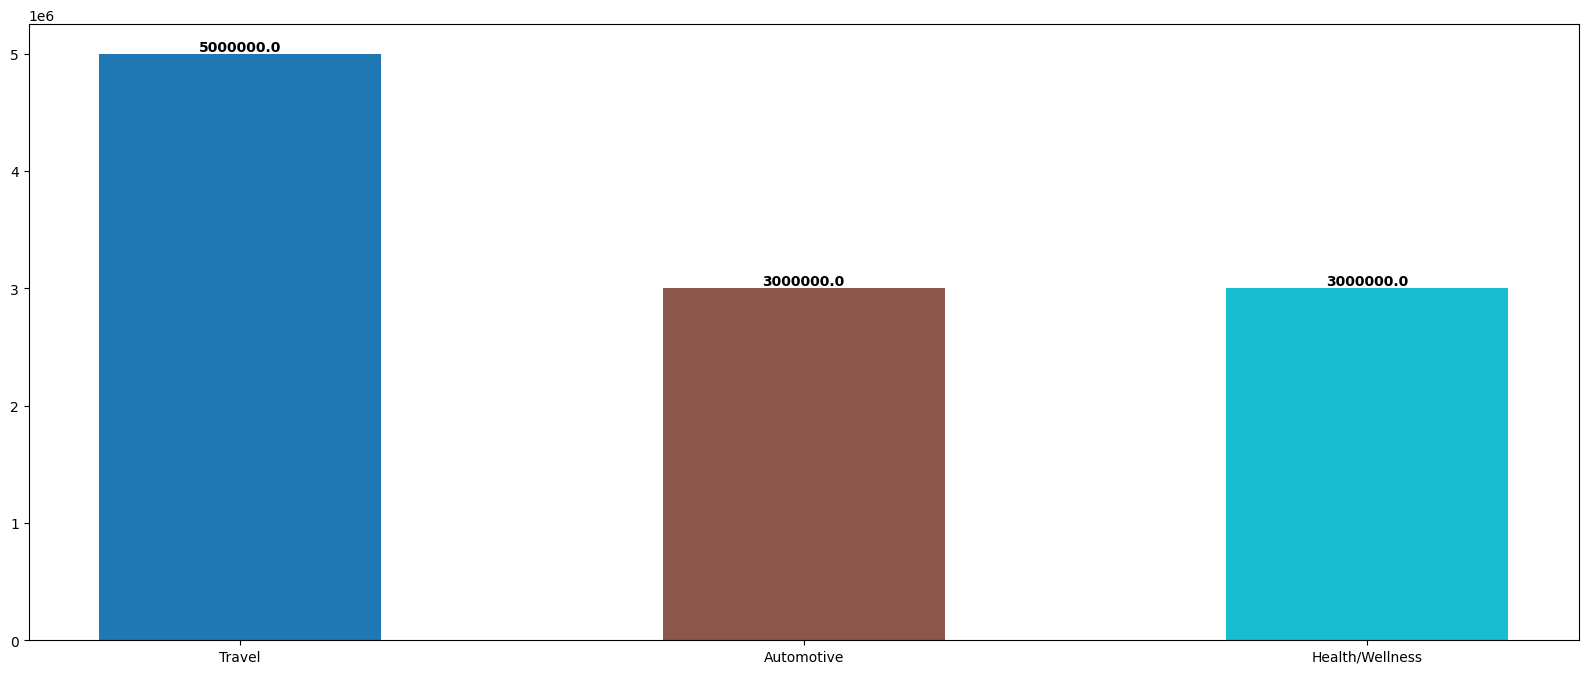

In [19]:
# Question - 4 :- Top-3 Industries with highest deals in the shark tank?

Industry_Count = pd.DataFrame(Dataset.groupby("Industry")["Total Deal Amount"].max().rename("Total Deal Amount")).sort_values(by="Total Deal Amount", ascending=False)[:3]
print(Industry_Count.columns)
colors = plt.cm.get_cmap("tab10", 3)
plt.figure(figsize=(20,8))
plt.bar(x=Industry_Count.index,height=Industry_Count["Total Deal Amount"],width=0.5,color=colors(range(3)),)

for i,value in enumerate(Industry_Count['Total Deal Amount']) :
    plt.text(i, value, str(value) , ha="center" , va="bottom" , weight = "bold")
plt.show()

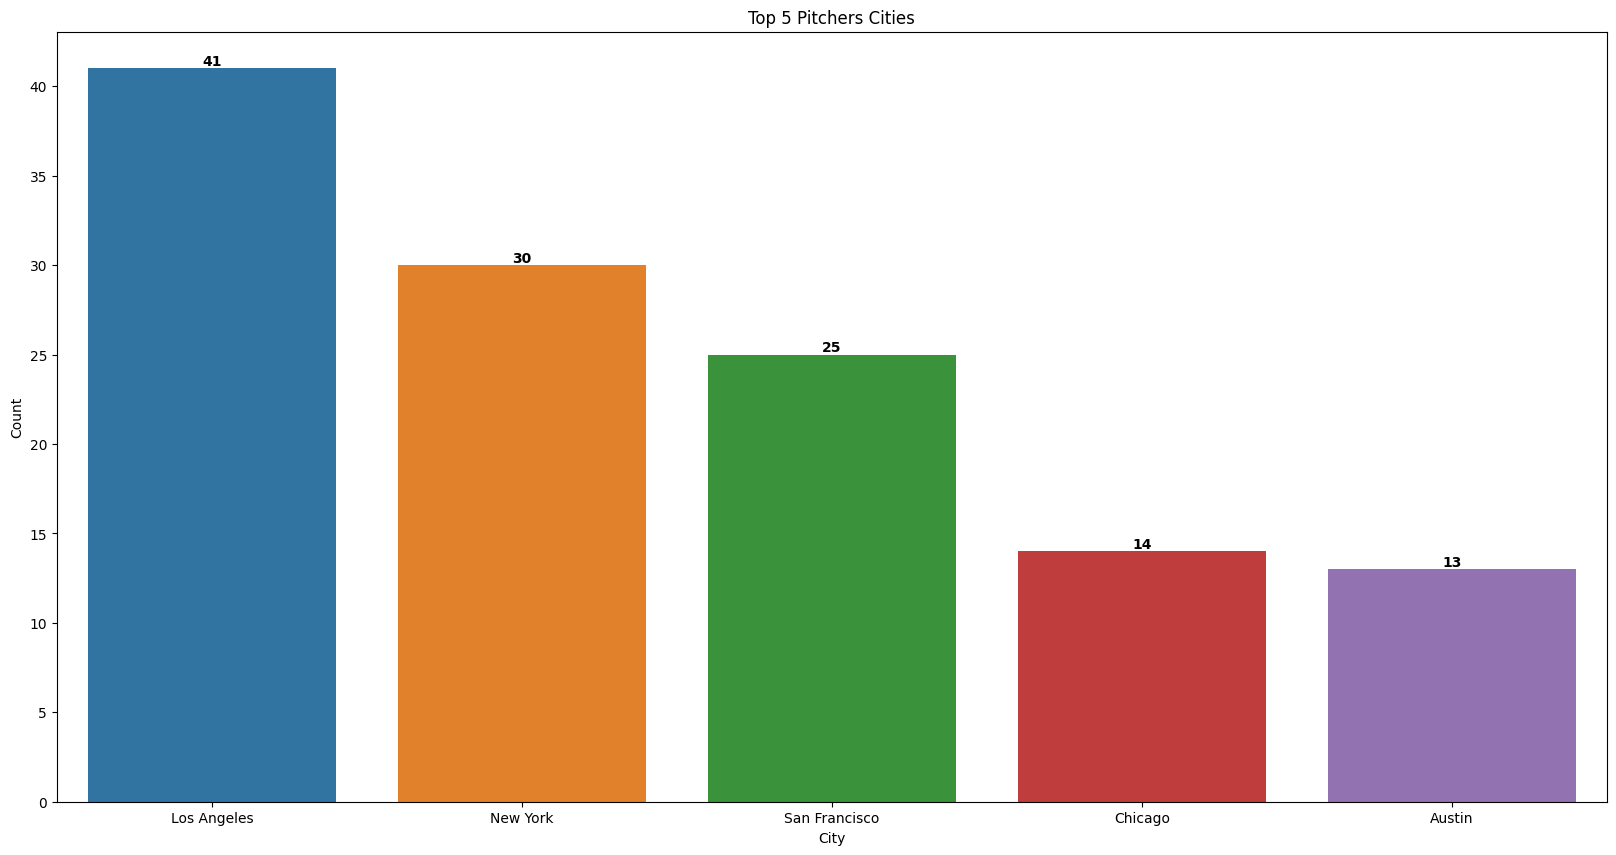

In [3]:
# Question - 5 :- Which are the top-5 cities with the maximum number of entrepreneurs?

City_Count = pd.DataFrame(Dataset["Pitchers City"].value_counts().rename("Counts")[:5])
plt.figure(figsize=(20, 10))
sns.barplot(x=City_Count.index, y="Counts", data=City_Count, hue=City_Count.index)

for i, value in enumerate(City_Count['Counts']):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")
    
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Top 5 Pitchers Cities")
plt.show()

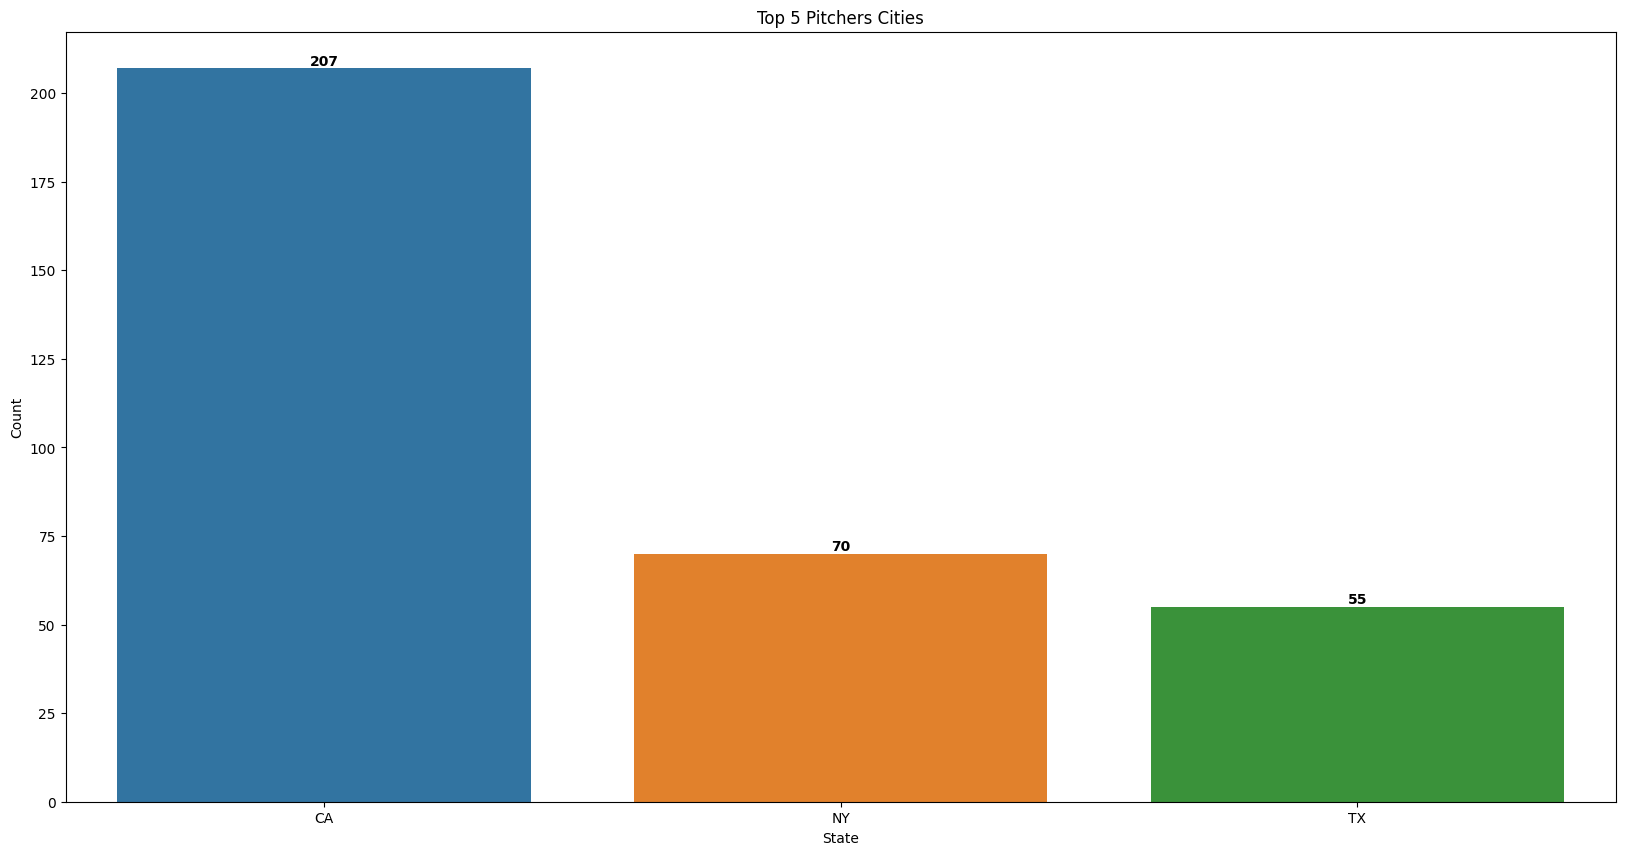

In [4]:
# Question - 6 :- Which are the top-3 states that has got maximum number of deals?

State_Count = pd.DataFrame(Dataset["Pitchers State"].value_counts().rename('Counts'))[:3]
plt.figure(figsize=(20, 10))
sns.barplot(x=State_Count.index, y="Counts", data=State_Count, hue=State_Count.index)

for i, value in enumerate(State_Count["Counts"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("State")
plt.ylabel("Count")
plt.title("Top 5 Pitchers Cities")
plt.show()

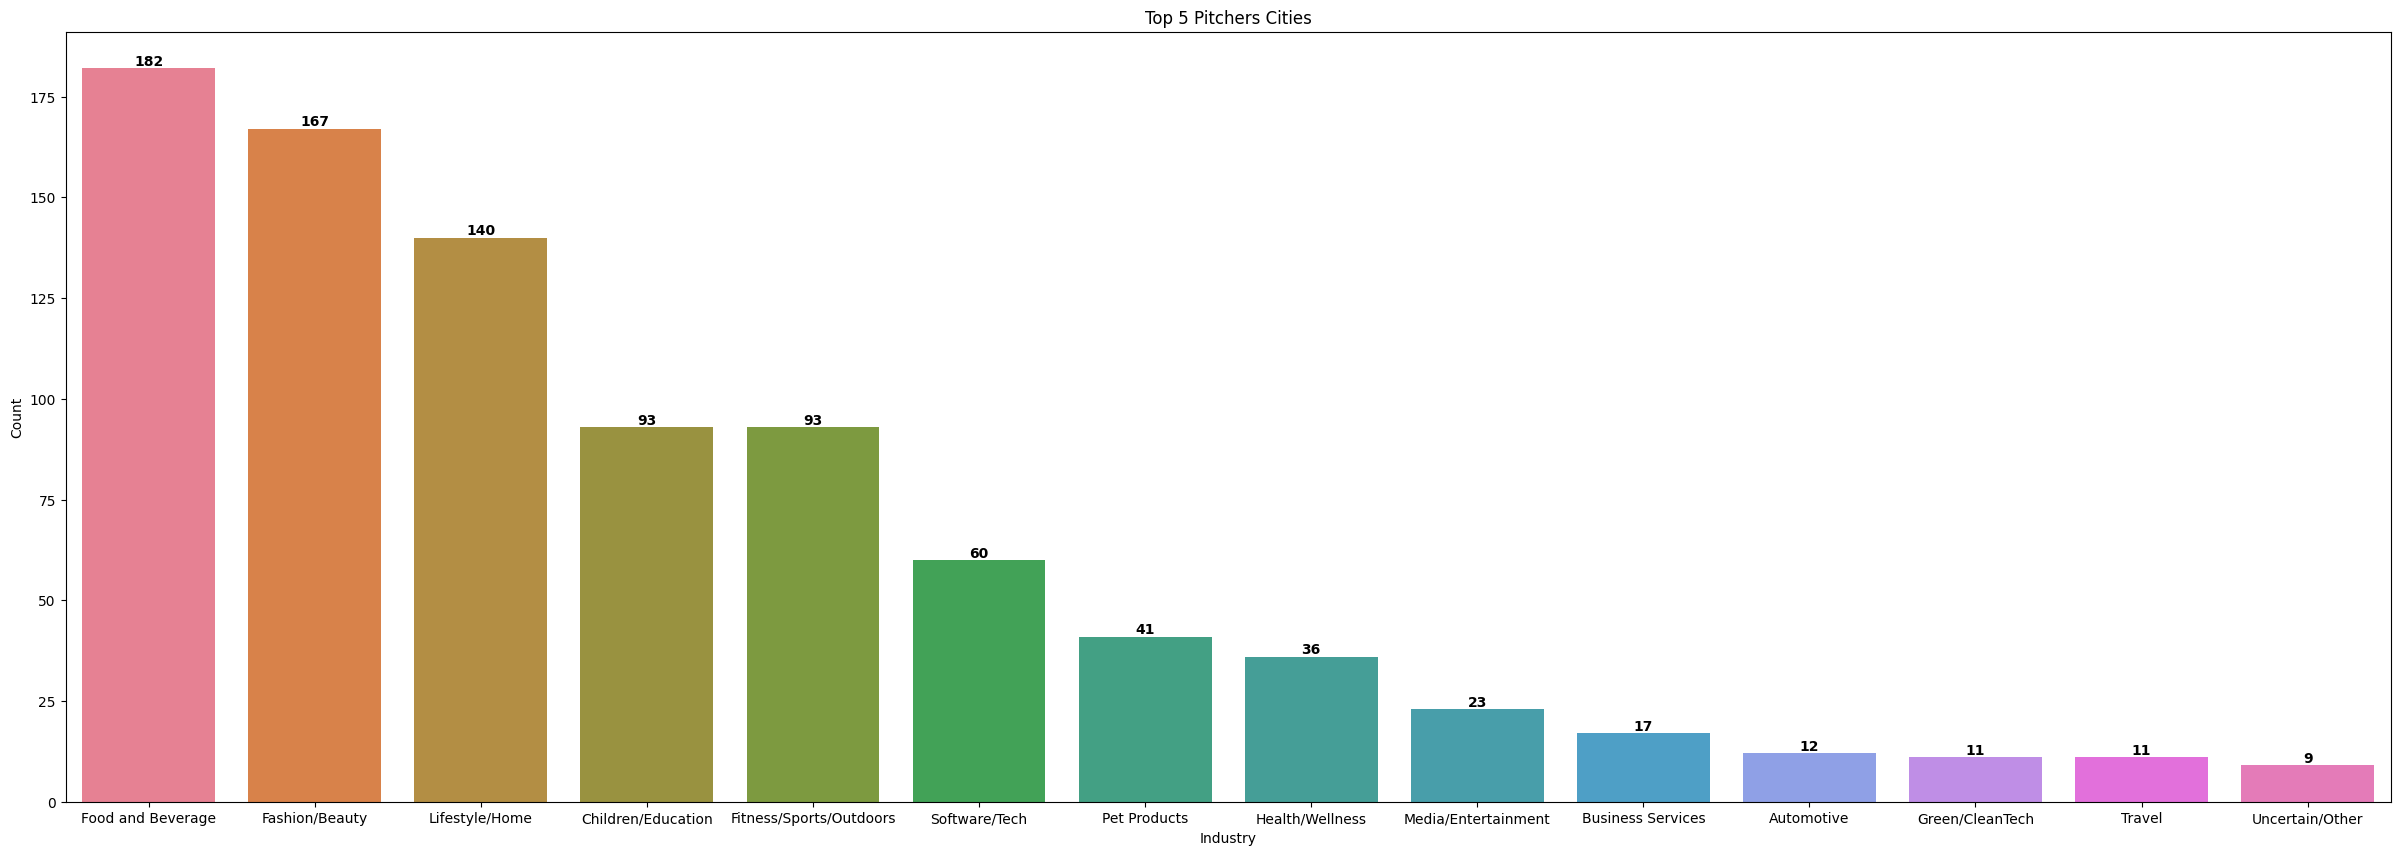

In [37]:
# Question - 7 :- Industry wise count the total number of startups who pitched in shark tank

Industry_Count = pd.DataFrame(Dataset["Industry"].value_counts().rename('Counts'))
plt.figure(figsize=(30, 10))
sns.barplot(x=Industry_Count.index, y="Counts", data=Industry_Count, hue=Industry_Count.index)

for i, value in enumerate(Industry_Count["Counts"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Industry")
plt.ylabel("Count")
plt.title("Top 5 Pitchers Cities")
plt.show()

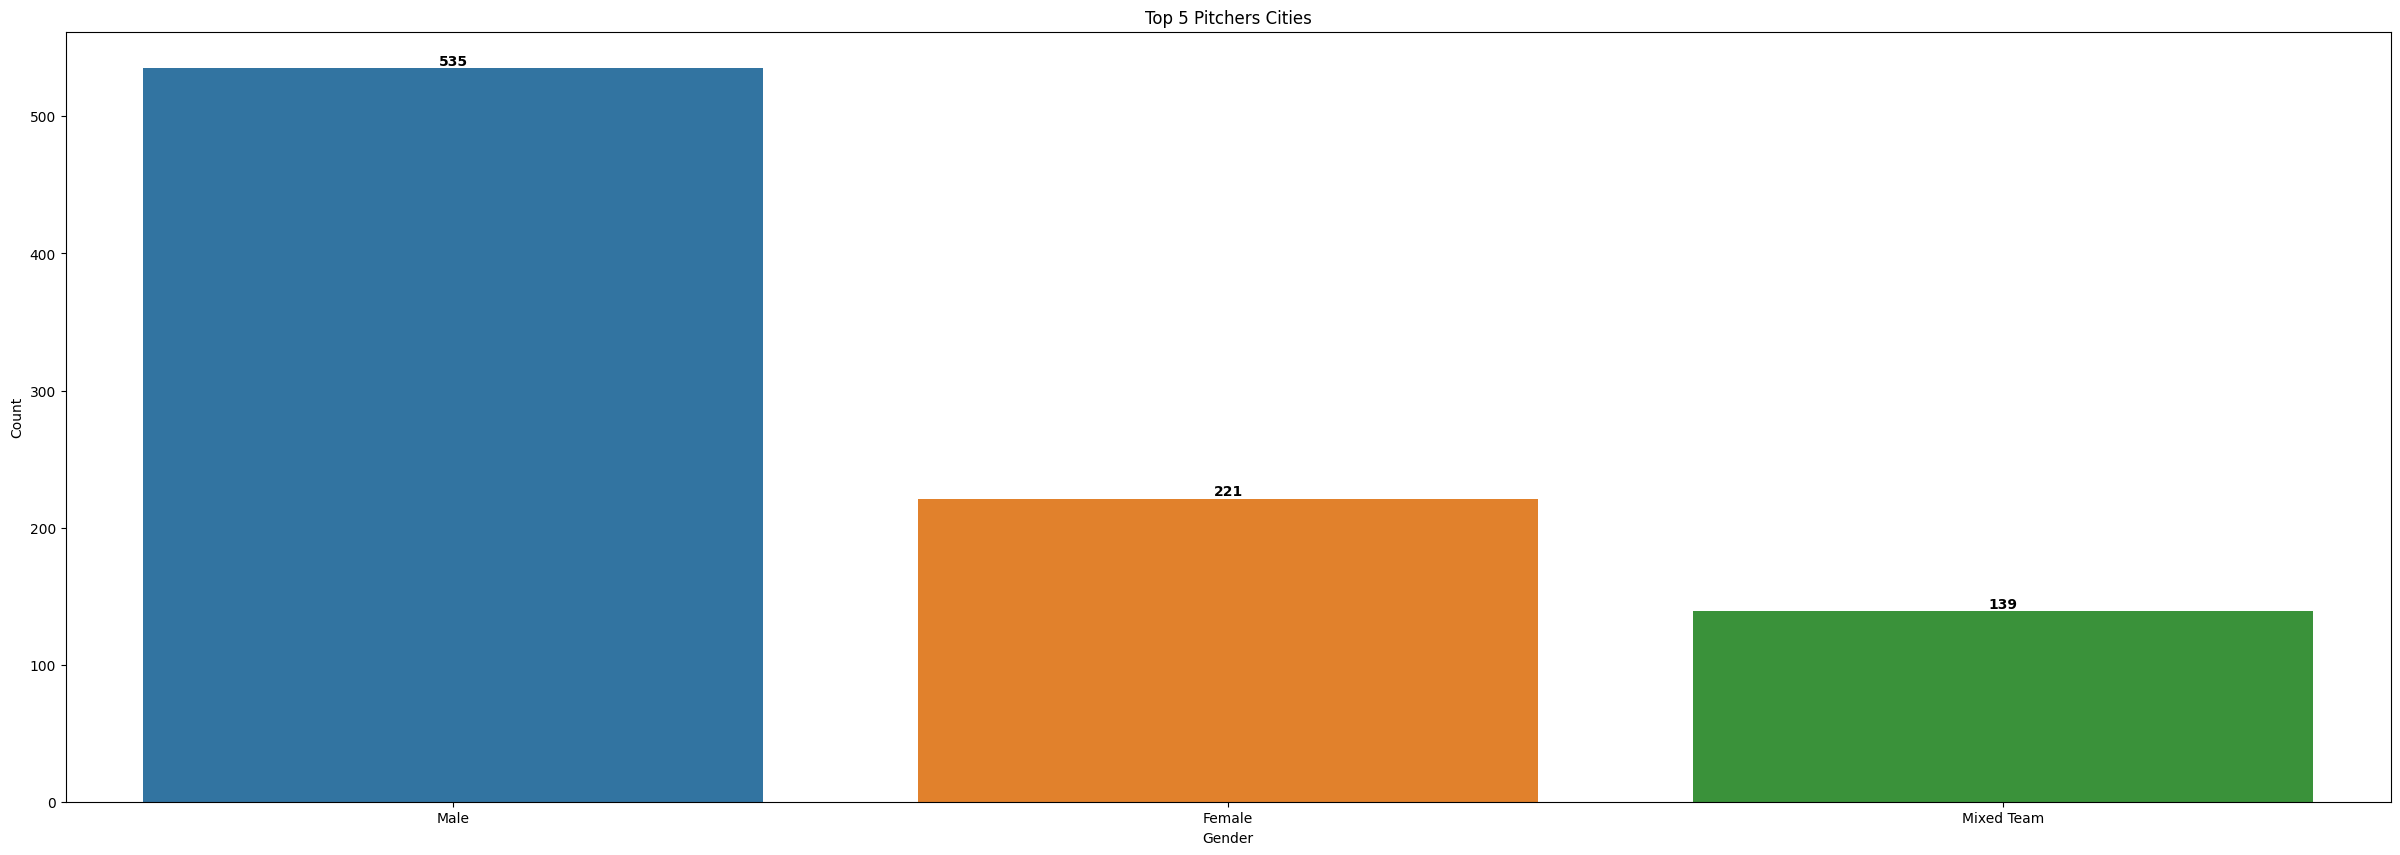

In [39]:
# Question - 8 :- Count the number of pitchers who are male, female and belongs to mixed team

Gender_Count = pd.DataFrame(Dataset["Pitchers Gender"].value_counts().rename('Counts'))
plt.figure(figsize=(30, 10))
sns.barplot(x=Gender_Count.index, y="Counts", data=Gender_Count, hue=Gender_Count.index)

for i, value in enumerate(Gender_Count["Counts"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Top 5 Pitchers Cities")
plt.show()

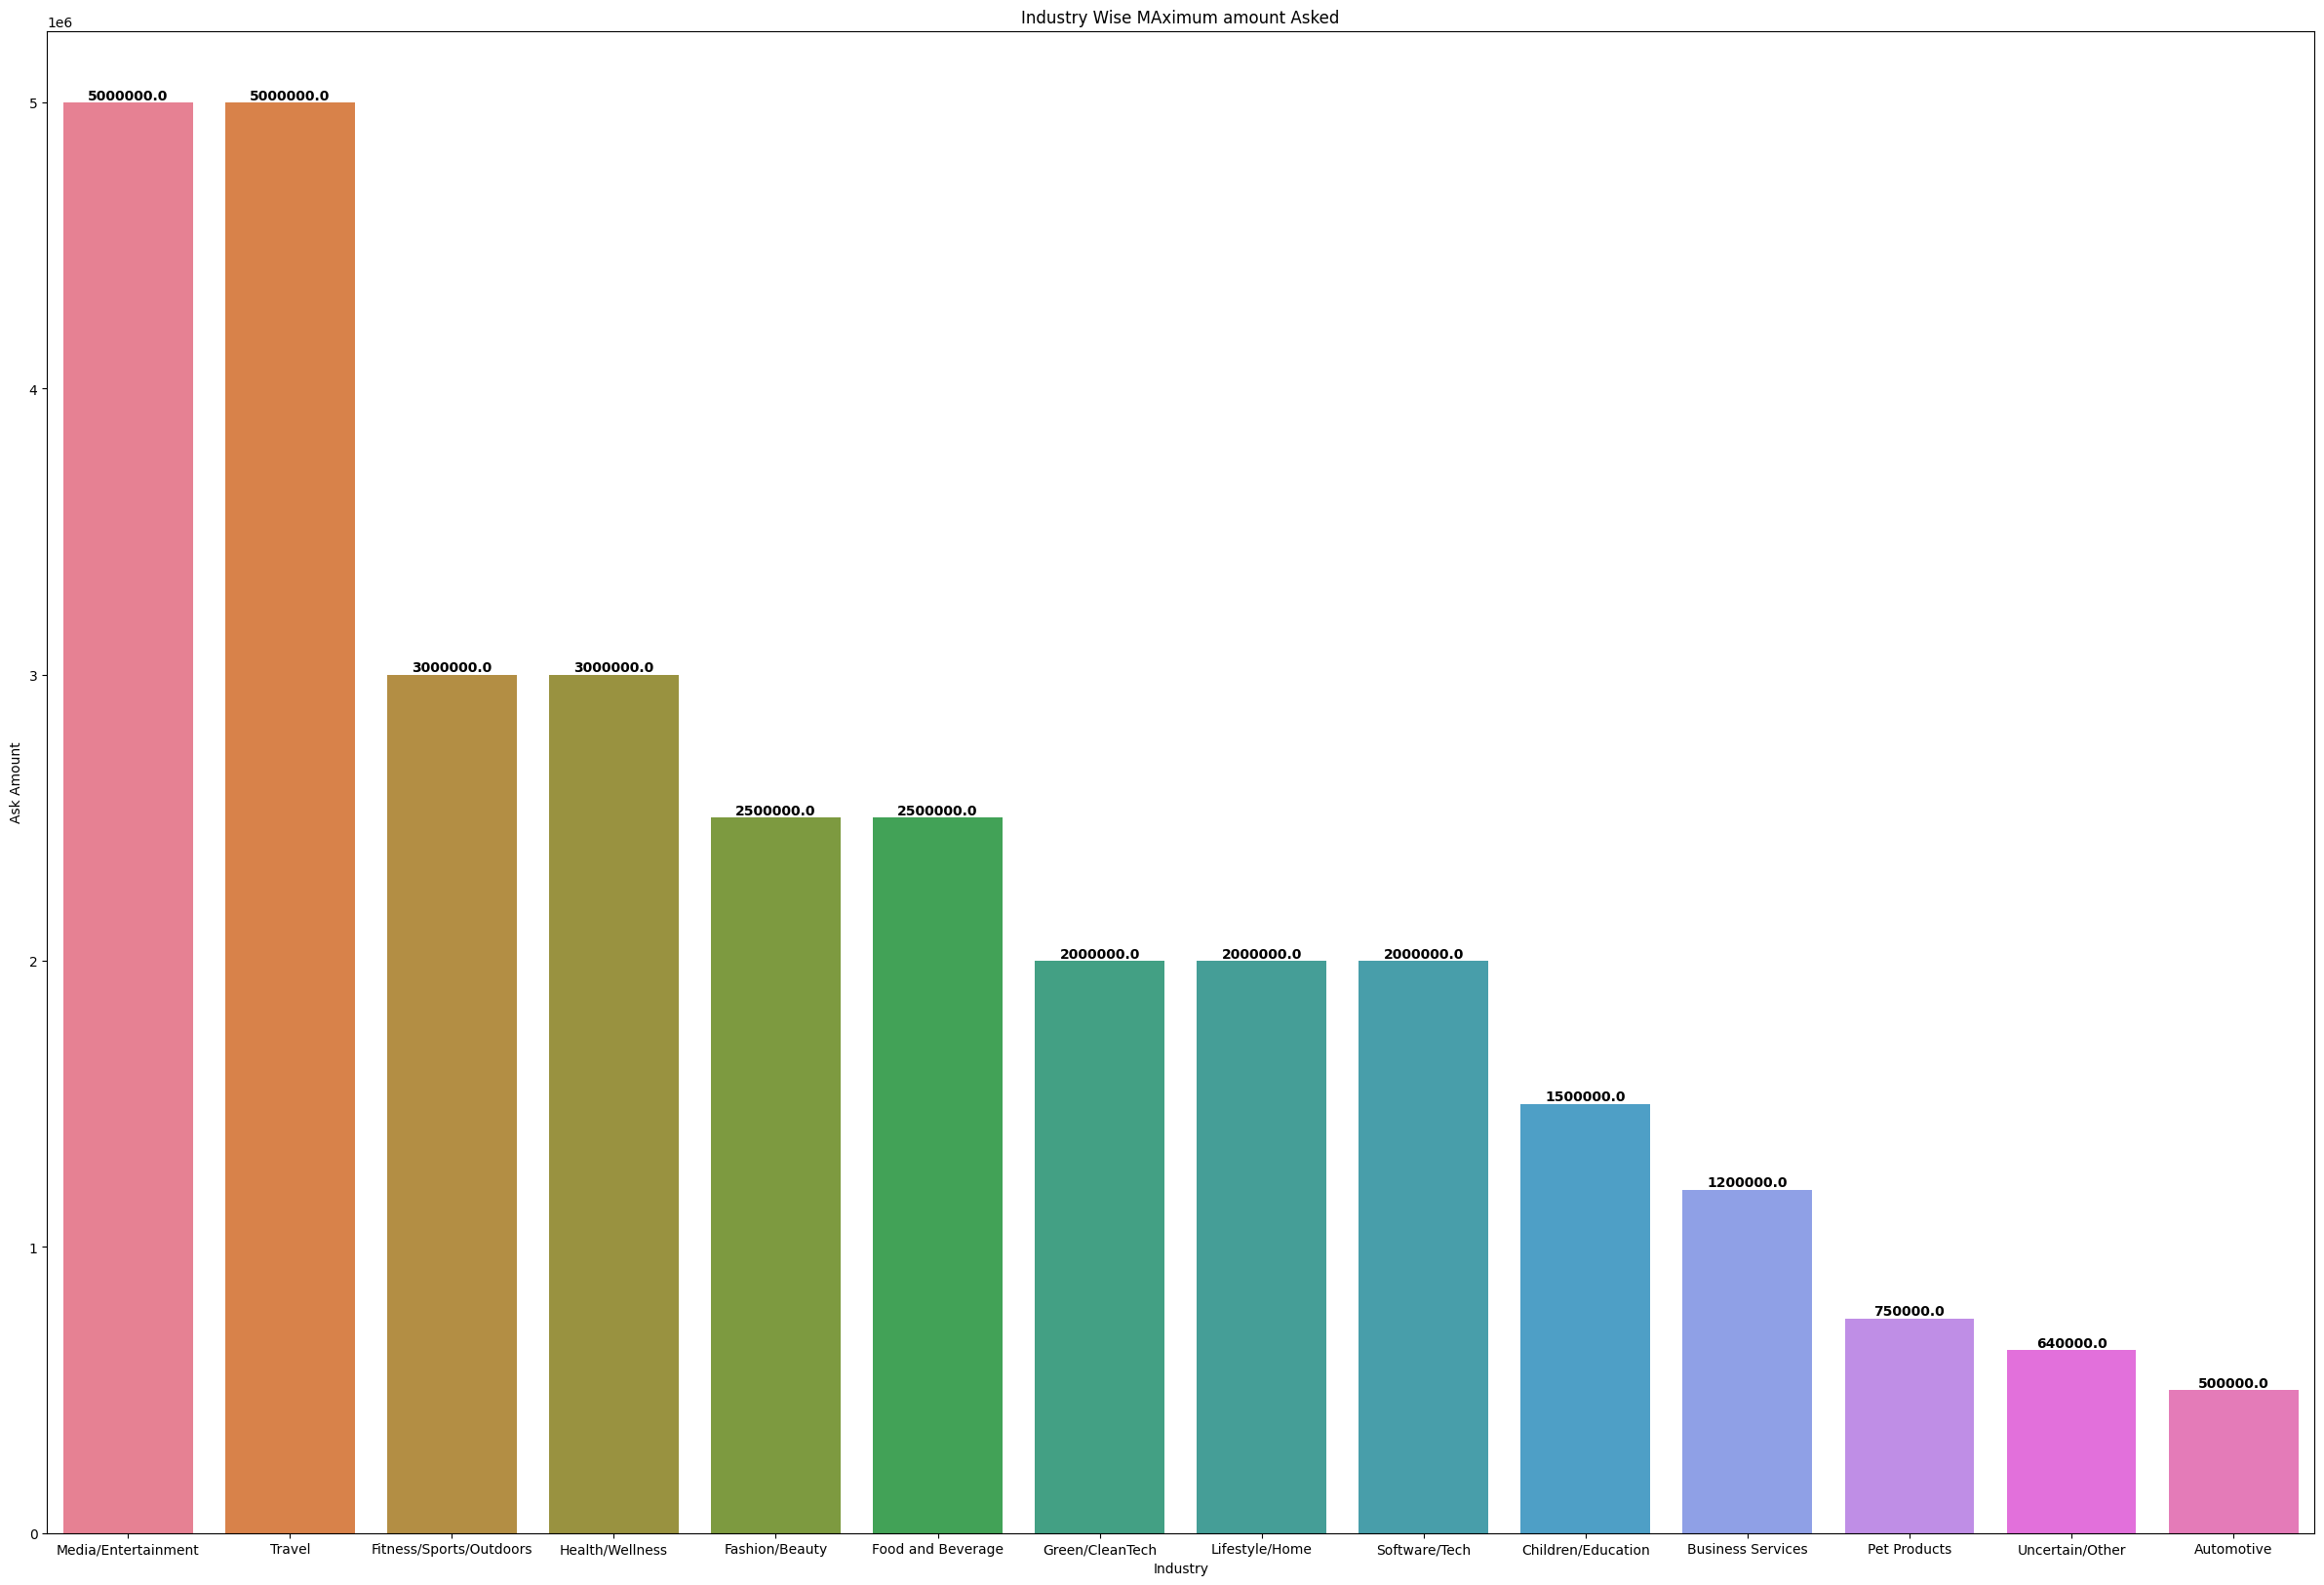

In [41]:
# Question - 9 :- Find the maximum amount requested by a pitcher in each industrial segment

Industry_Wise_Deal_Amount = (Dataset.groupby("Industry")["Original Ask Amount"].max().reset_index())
Industry_Wise_Deal_Amount = Industry_Wise_Deal_Amount.sort_values(by = 'Original Ask Amount' , ascending = False)

plt.figure(figsize=(30,20))
sns.barplot(data=Industry_Wise_Deal_Amount,x="Industry",y="Original Ask Amount",hue="Industry",)

for i,value in enumerate(Industry_Wise_Deal_Amount['Original Ask Amount']) :
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xlabel("Industry")
plt.ylabel("Ask Amount")
plt.title("Industry Wise MAximum amount Asked")
plt.show()

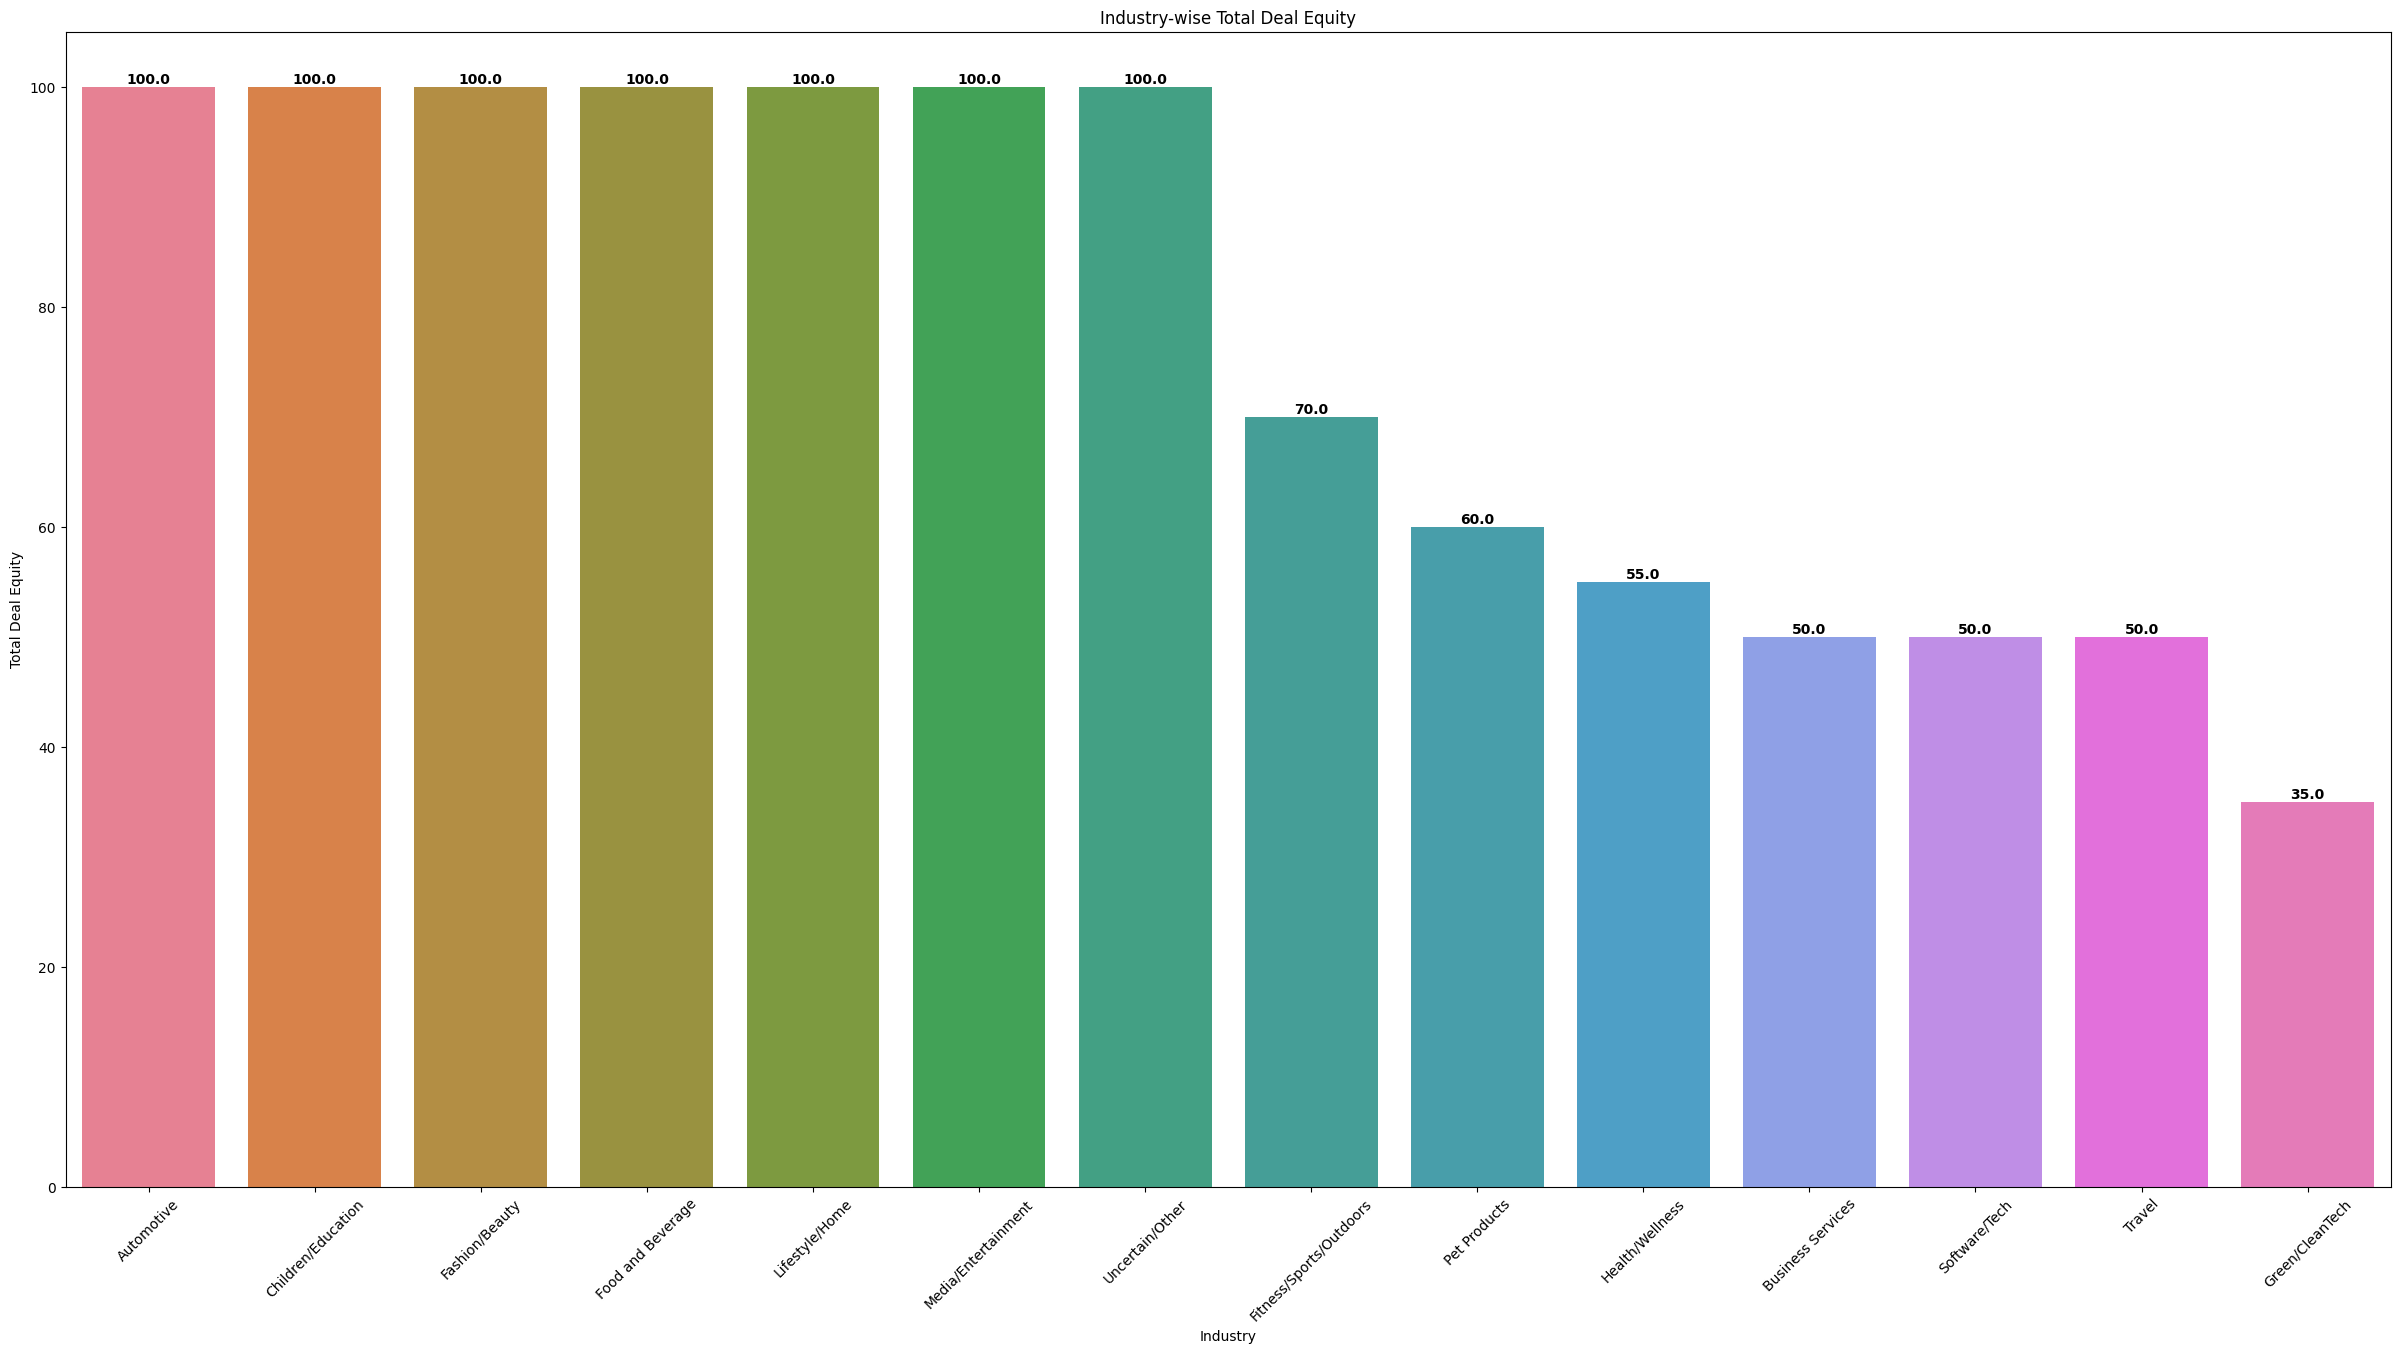

In [50]:
# Question - 10 :- Find the maximum equity received by a shark in each industrial segment

Industry_Wise_Received_Equity = Dataset.groupby("Industry")["Total Deal Equity"].max()
Industry_Wise_Received_Equity = pd.DataFrame(Industry_Wise_Received_Equity)
Industry_Wise_Received_Equity = Industry_Wise_Received_Equity.sort_values(by="Total Deal Equity", ascending=False)

plt.figure(figsize=(30, 15))
sns.barplot(data=Industry_Wise_Received_Equity.reset_index(),x="Industry", y="Total Deal Equity",hue="Industry")

for i,value in enumerate(Industry_Wise_Received_Equity['Total Deal Equity']) :
    plt.text(i , value , str(value), ha = "center" , va = "bottom" , weight = "bold")
    
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Total Deal Equity")
plt.title("Industry-wise Total Deal Equity")
plt.show()

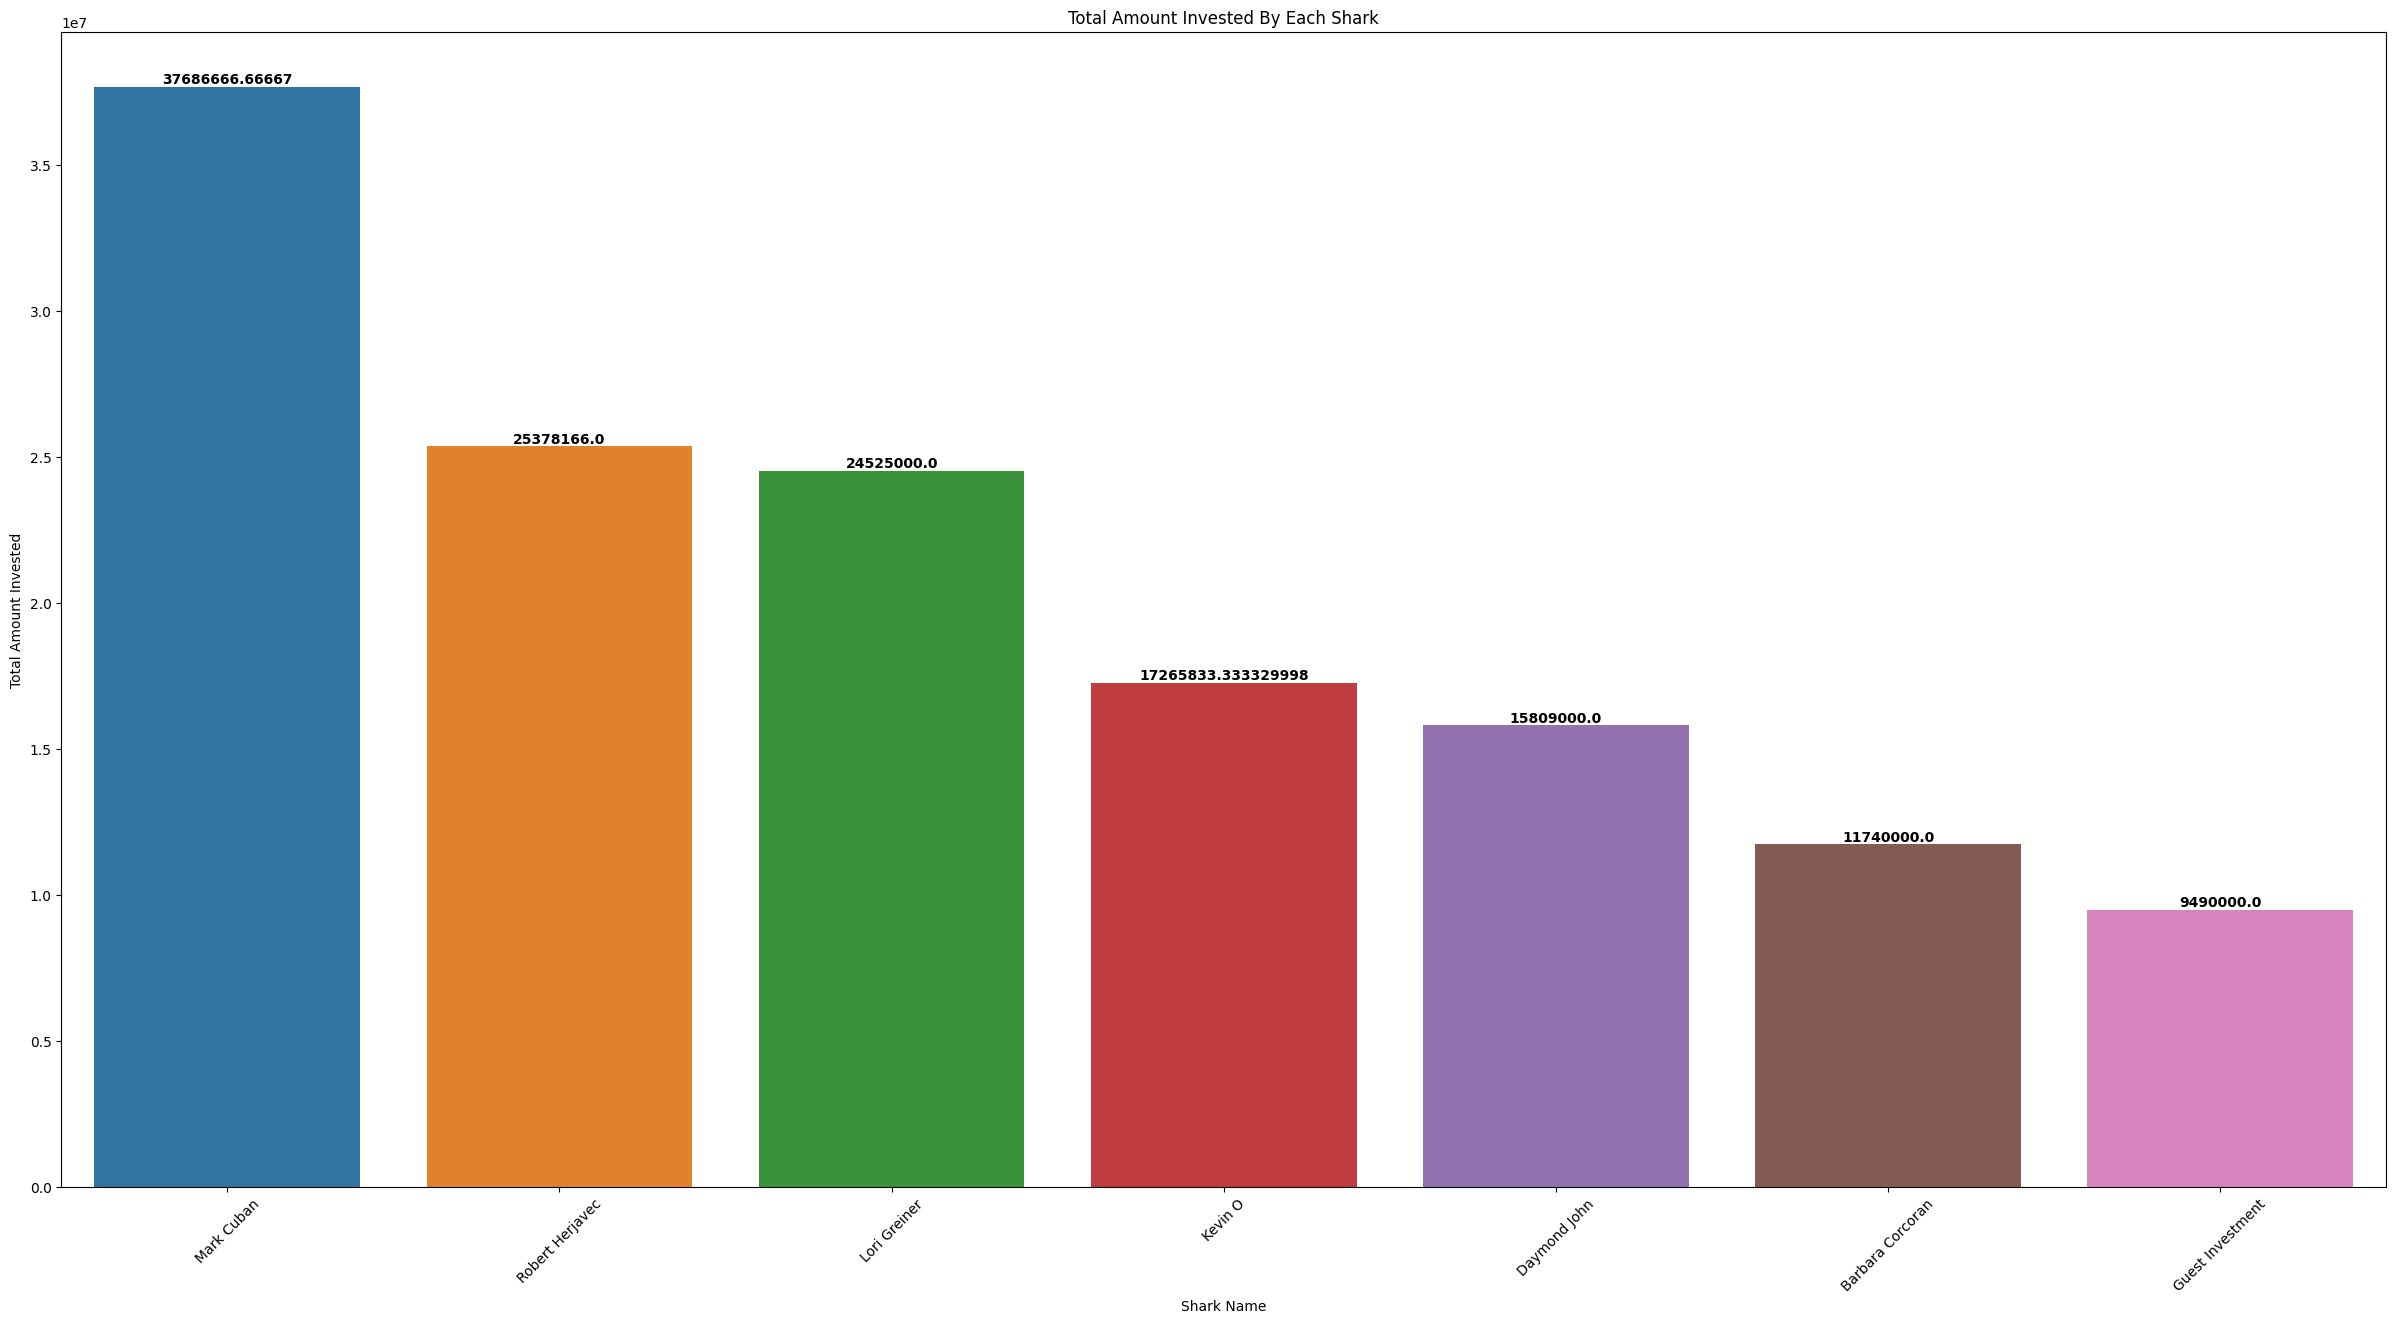

In [53]:
# Question - 11 :- Find the total amount invested by each shark throughout shark tank

Dataset = Dataset.fillna(0)
Investments_of_Sharks = {}
Investments_of_Sharks['Shark_Name'] = []
Investments_of_Sharks['Amount'] = []

Column_Name = ["Barbara Corcoran Investment Amount","Mark Cuban Investment Amount","Lori Greiner Investment Amount","Robert Herjavec Investment Amount","Daymond John Investment Amount","Kevin O Leary Investment Amount","Guest Investment Amount"]

for i in Column_Name :
    Shark_Name = i.split(' ')
    Investments_of_Sharks["Shark_Name"].append(Shark_Name[0] + " " + Shark_Name[1])
    Investments_of_Sharks['Amount'].append(Dataset[i].sum())

Investments_of_Sharks = pd.DataFrame(Investments_of_Sharks).sort_values(by = "Amount" , ascending=False)
pd.options.display.float_format = '{:.2f}'.format

plt.figure(figsize=(30,15))
sns.barplot(data=Investments_of_Sharks.reset_index(), x="Shark_Name", y="Amount", hue="Shark_Name")

for i,value in enumerate(Investments_of_Sharks['Amount']) :
    plt.text(i, value, str(value), ha = "center", va = "bottom", weight = "bold")

plt.xticks(rotation=45)
plt.xlabel("Shark Name")
plt.ylabel("Total Amount Invested")
plt.title("Total Amount Invested By Each Shark")
plt.show()

                   Startup Name  Total Deal Amount
0                        AirCar         5000000.00
1                  SynDaverLabs         3000000.00
2                  MokiDoorstep         3000000.00
3                          Zipz         2500000.00
4   TenThirtyOneHauntedHayrides         2000000.00
5                       Fizzics         2000000.00
6                         Vengo         2000000.00
7                  RuggedManiac         1750000.00
8                       Sworkit         1500000.00
9                        XCraft         1500000.00
10                  BeyondSushi         1500000.00
11                    Trunkster         1400000.00
12              Jackson'sHonest         1250000.00
13                       HyConn         1250000.00
14          TheRedDressBoutique         1200000.00


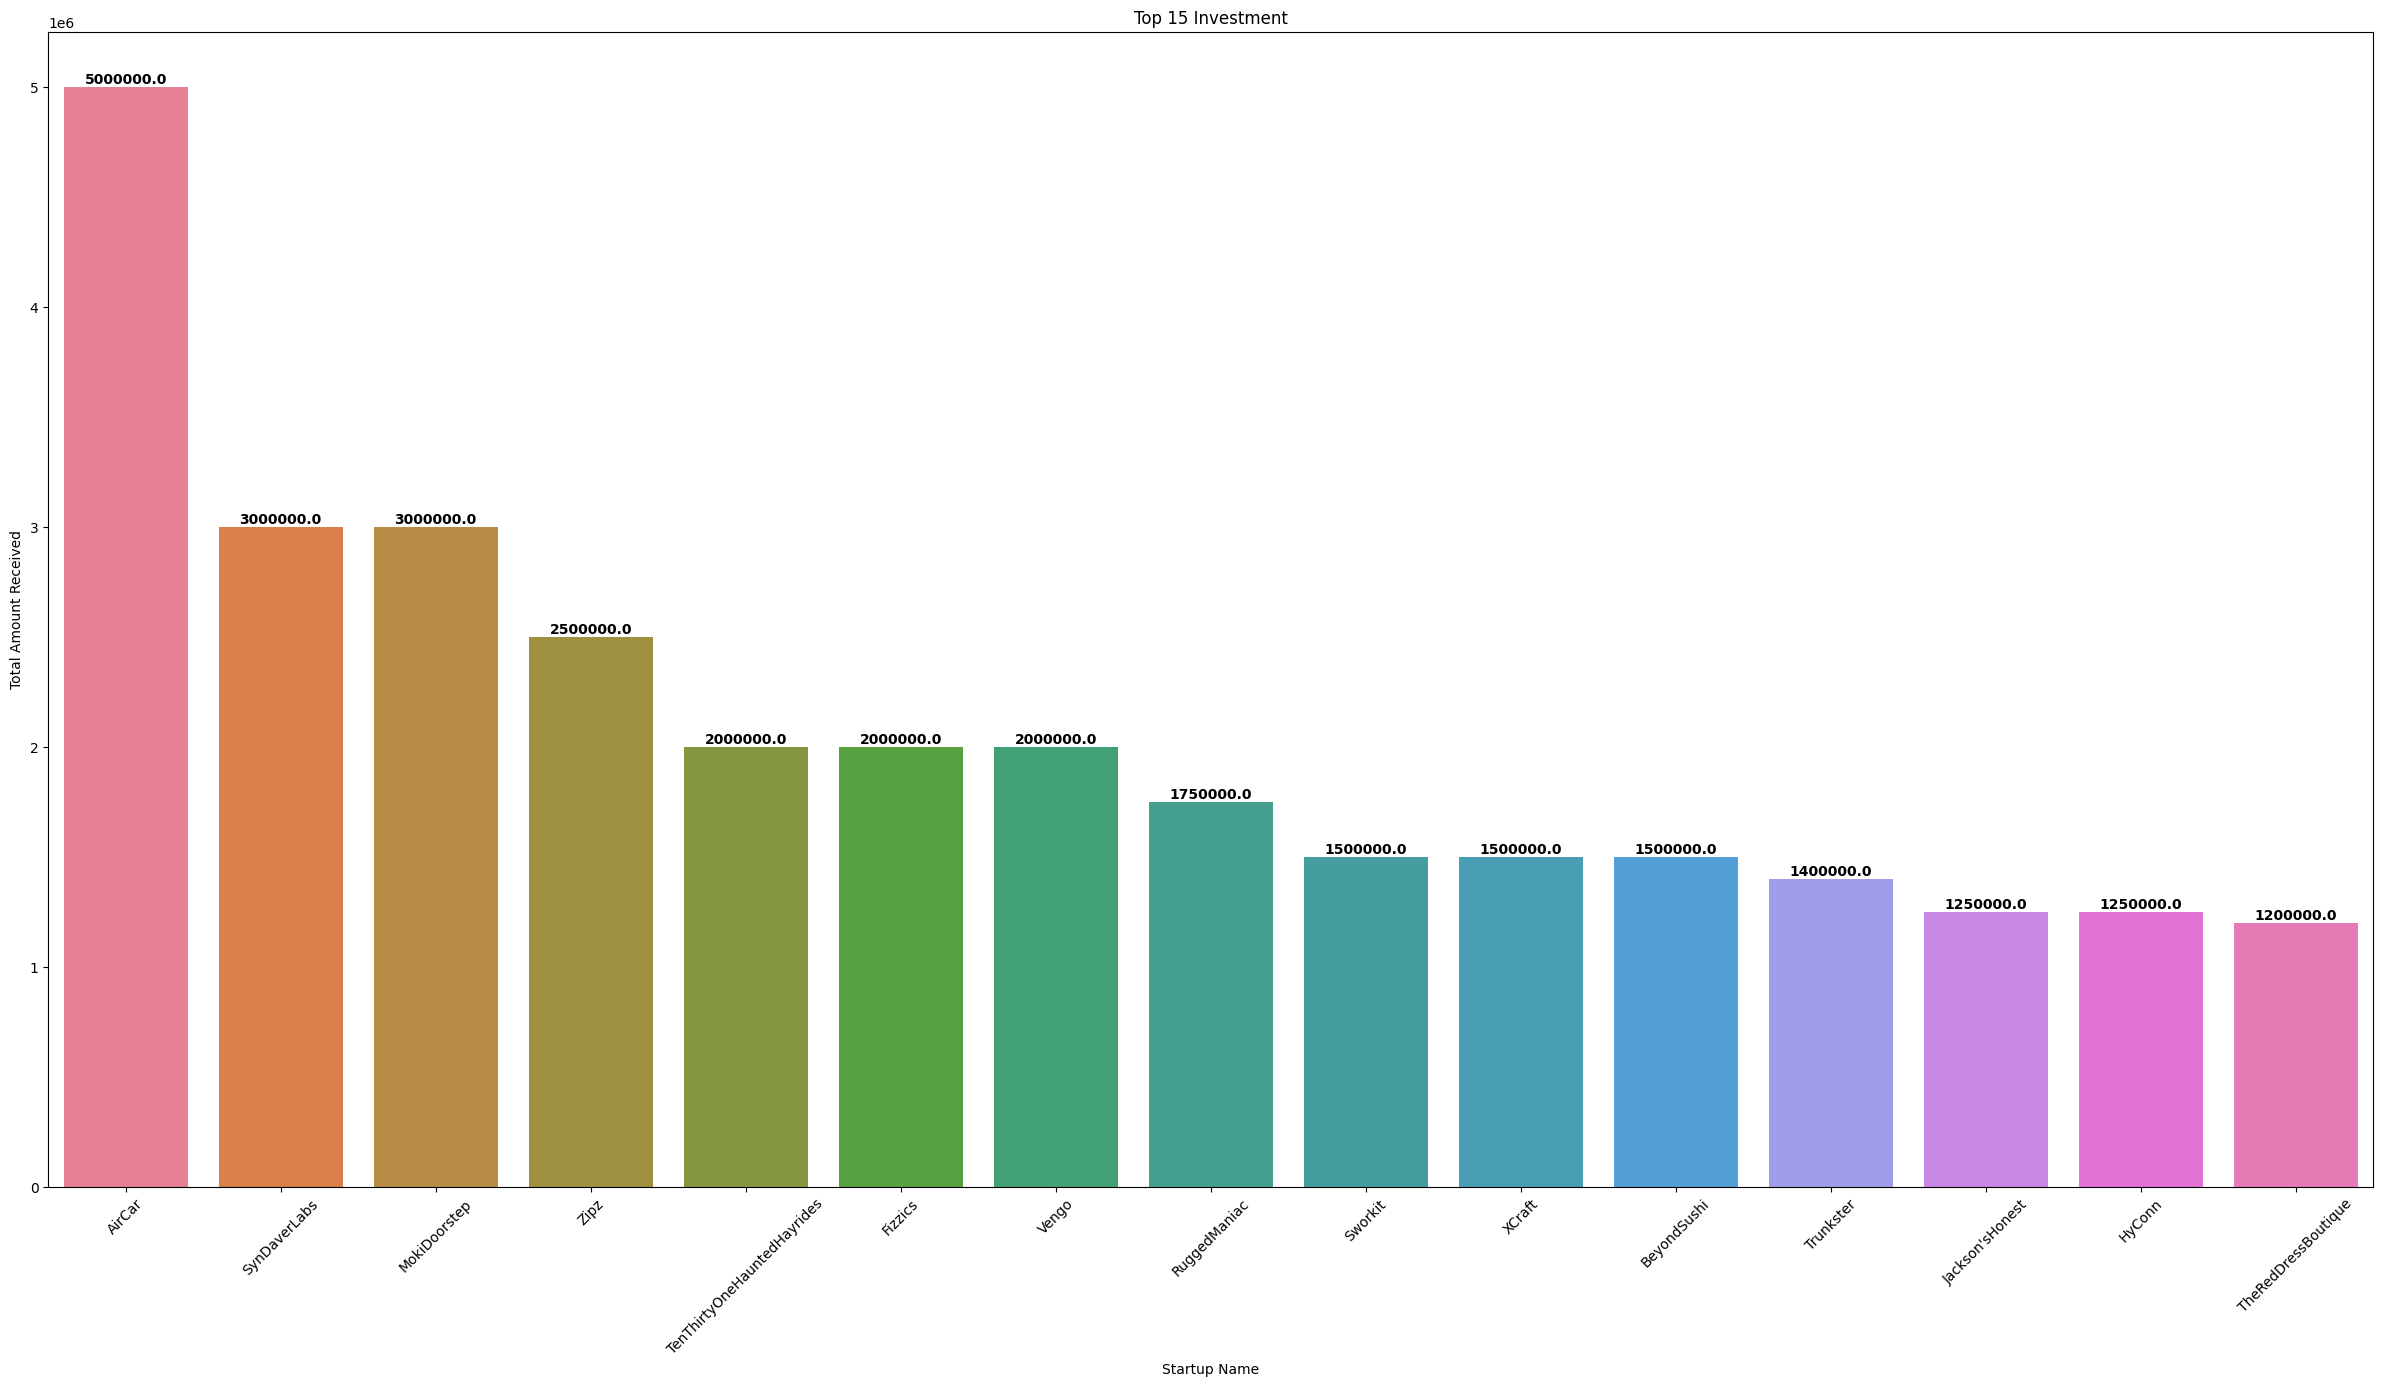

In [55]:
# Question - 12 :- Name the startups with Top-15 investments

Sorted_Deal = Dataset.sort_values(by="Total Deal Amount" , ascending=False).reset_index()[:15]
print(Sorted_Deal[["Startup Name" , "Total Deal Amount"]])
plt.figure(figsize=(30, 15))
sns.barplot(data=Sorted_Deal,x="Startup Name",y="Total Deal Amount",hue="Startup Name")

for i, value in enumerate(Sorted_Deal["Total Deal Amount"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xticks(rotation=45)
plt.xlabel("Startup Name")
plt.ylabel("Total Amount Received")
plt.title("Top 15 Investment")
plt.show()

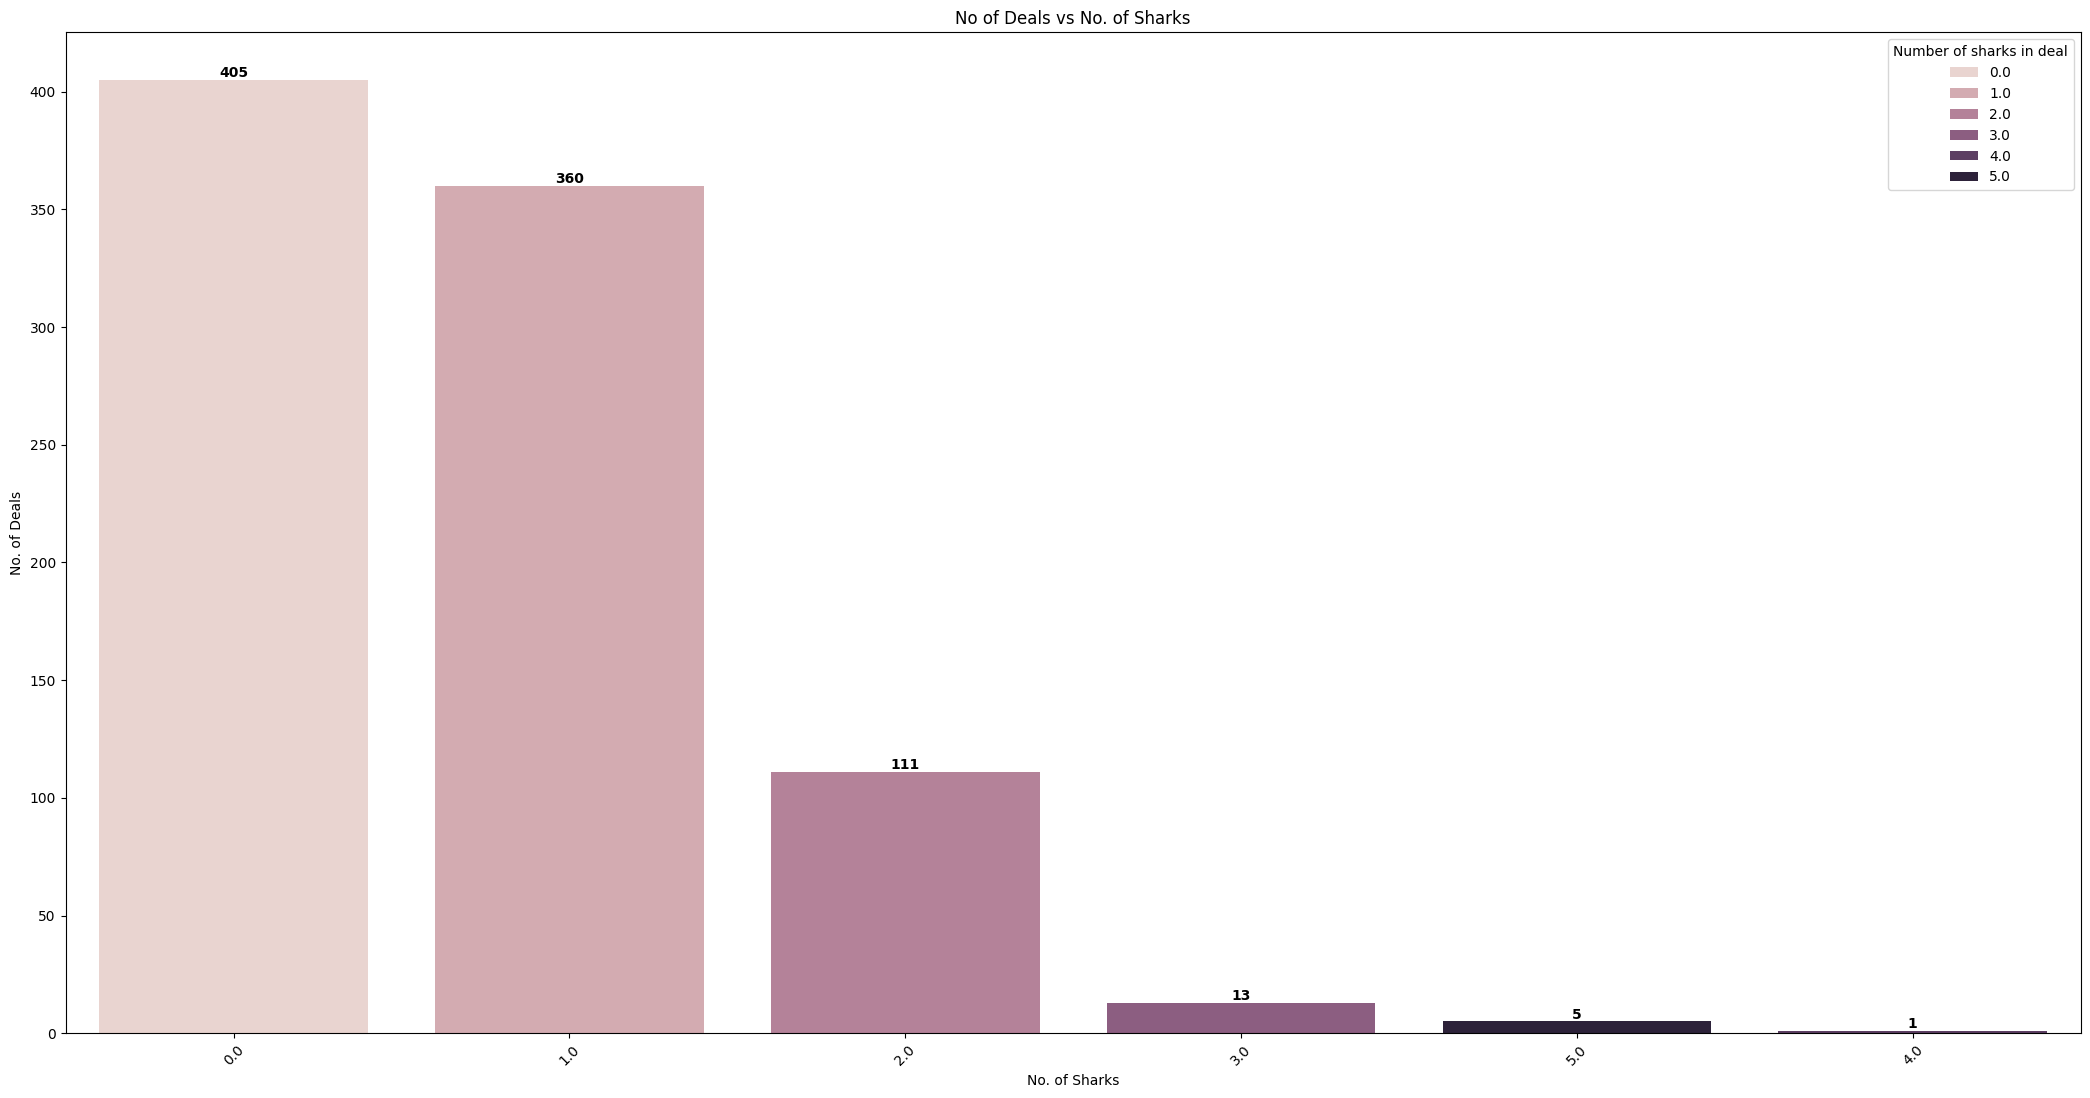

In [71]:
# Question - 13 :- Find number of deals having [1,2,3,4,5] sharks included in the deal

plt.figure(figsize=(26,13))
sns.countplot(x=Dataset["Number of sharks in deal"],hue=Dataset["Number of sharks in deal"],order=Dataset["Number of sharks in deal"].value_counts(ascending=False).index,)

for i, value in enumerate(Dataset["Number of sharks in deal"].value_counts()):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold")

plt.xticks(rotation=45)
plt.xlabel("No. of Sharks")
plt.ylabel("No. of Deals")
plt.title("No of Deals vs No. of Sharks")
plt.show()

                   Kevin O Leary Investment Amount
Industry                                          
Food and Beverage                        5862500.0
Lifestyle/Home                           2695000.0
Software/Tech                            1912500.0


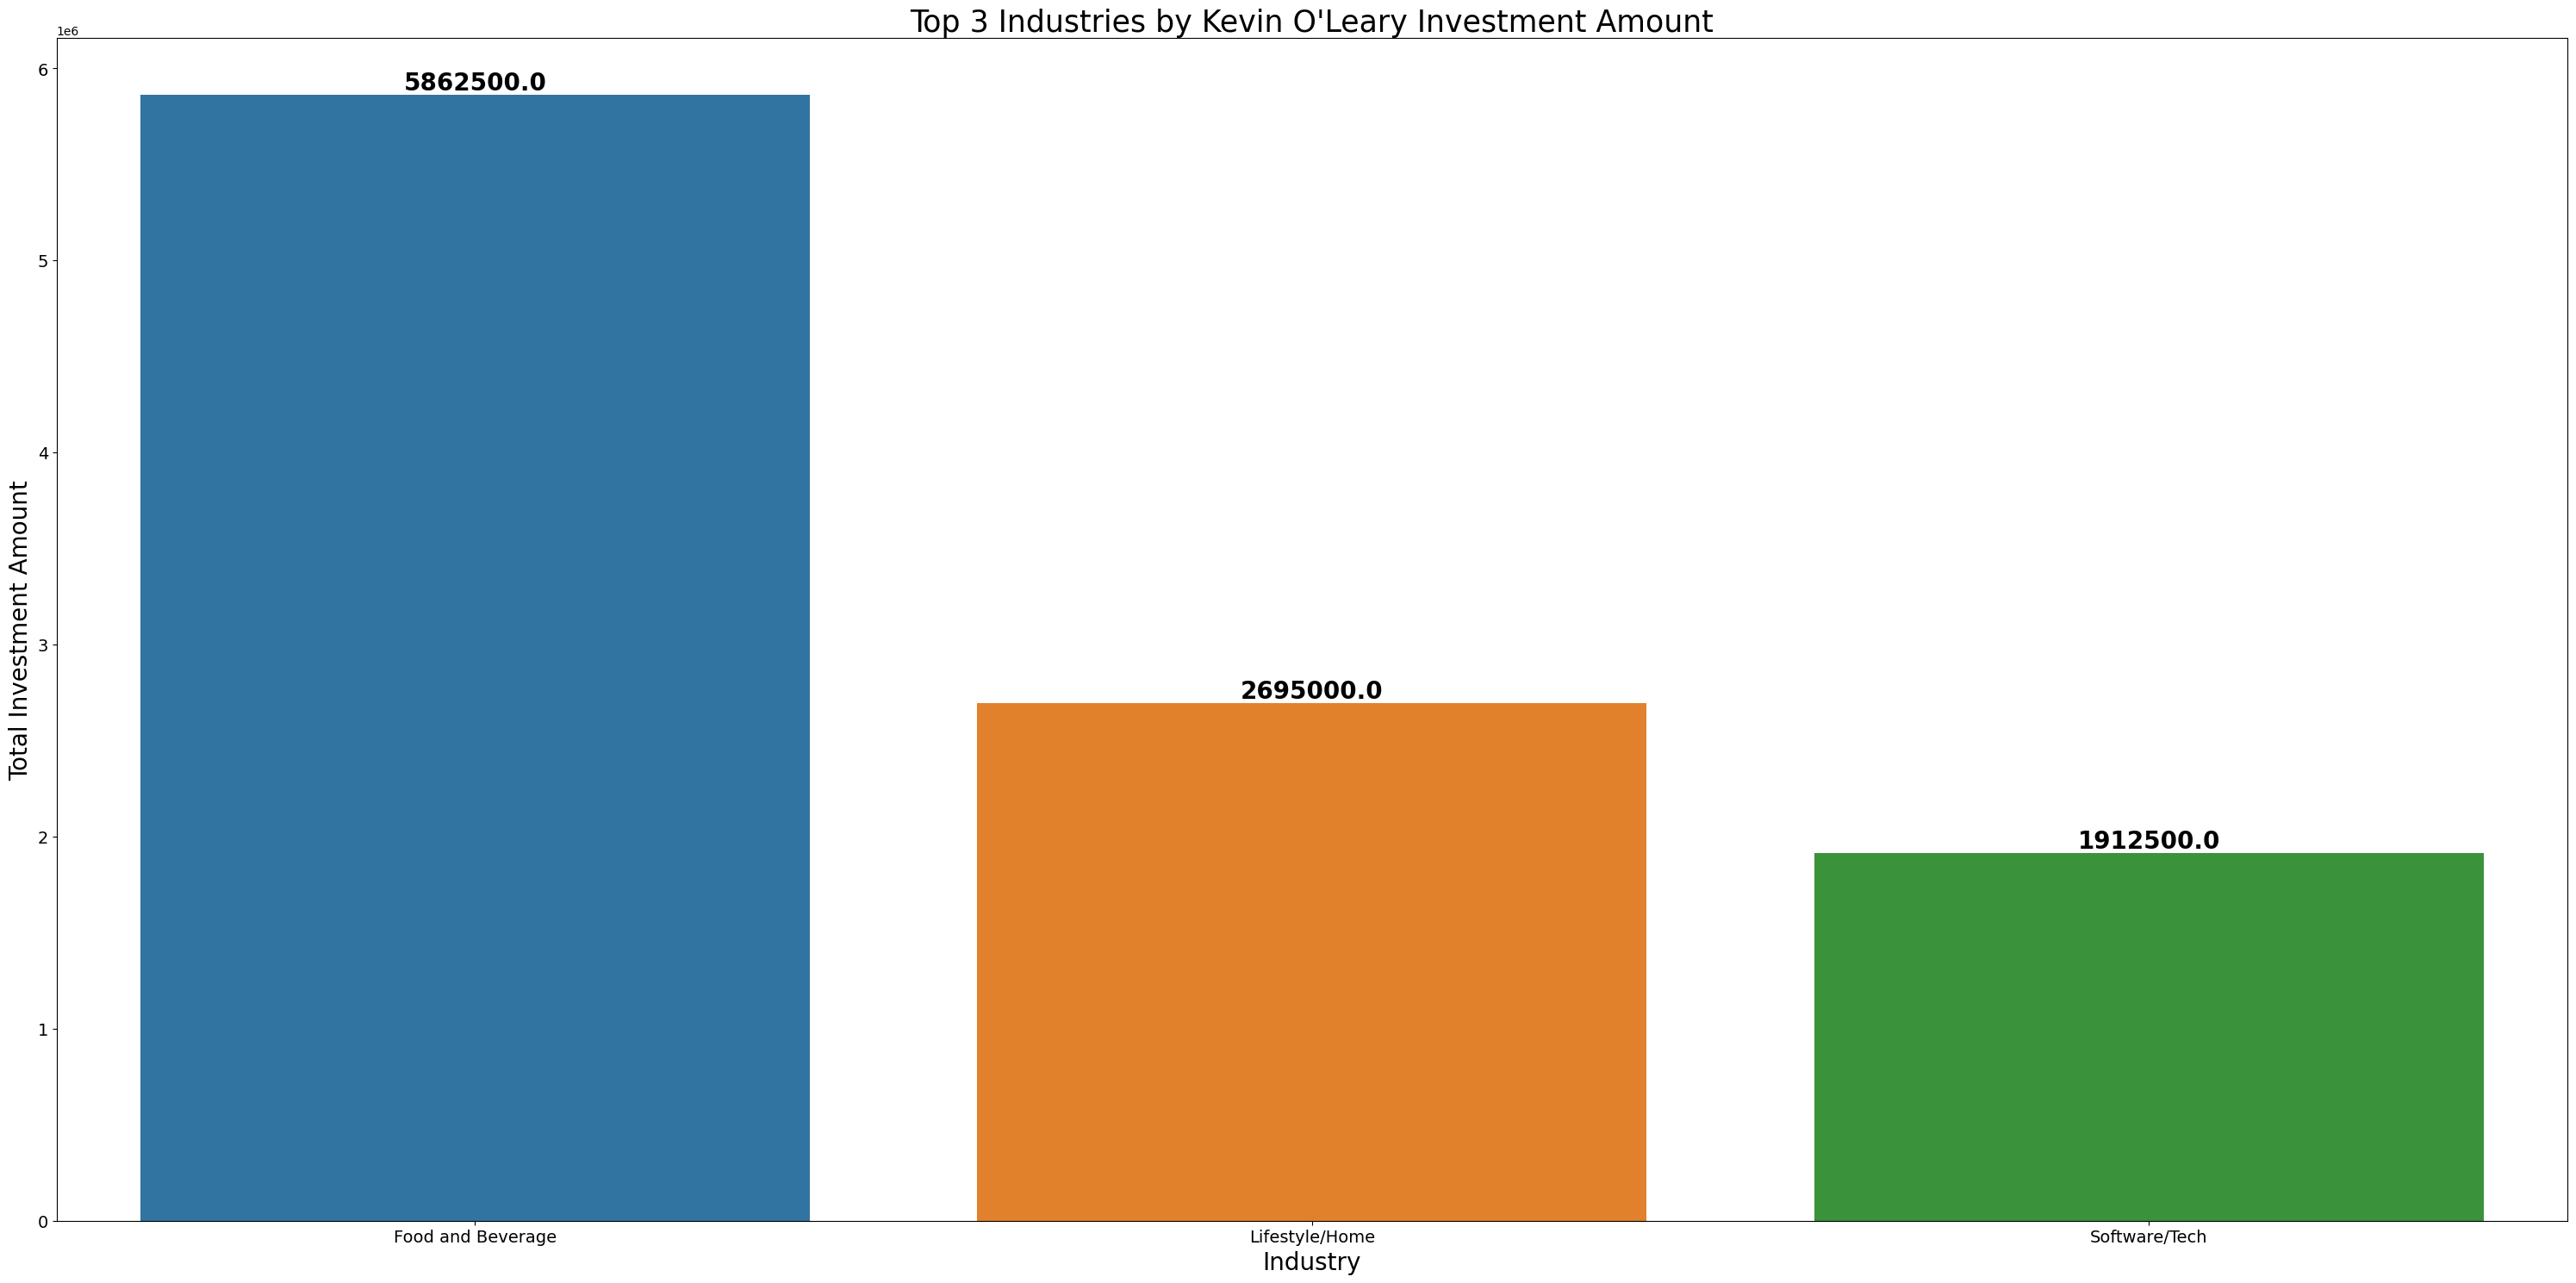

In [15]:
Dataset = Dataset.fillna(0)
Kevin_O_Leary_Interestered_Industries = Dataset.groupby("Industry")["Kevin O Leary Investment Amount"].sum()
Kevin_O_Leary_Interestered_Industries = pd.DataFrame(Kevin_O_Leary_Interestered_Industries)
Kevin_O_Leary_Interestered_Industries = Kevin_O_Leary_Interestered_Industries.sort_values(by="Kevin O Leary Investment Amount" , ascending=False )
Kevin_O_Leary_Interestered_Industries = Kevin_O_Leary_Interestered_Industries[:3]
print(Kevin_O_Leary_Interestered_Industries)

plt.figure(figsize=(30, 15))
sns.barplot(data=Kevin_O_Leary_Interestered_Industries, x=Kevin_O_Leary_Interestered_Industries.index, y="Kevin O Leary Investment Amount", hue=Kevin_O_Leary_Interestered_Industries.index)

for i, value in enumerate(Kevin_O_Leary_Interestered_Industries["Kevin O Leary Investment Amount"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold", fontsize=20) 

plt.title("Top 3 Industries by Kevin O'Leary Investment Amount", fontsize=25) 
plt.xlabel("Industry", fontsize=20)
plt.ylabel("Total Investment Amount", fontsize=20)  
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.show()

                   Total Deal Amount
Industry                            
Business Services          1625000.0
Green/CleanTech            1950000.0
Uncertain/Other            2290000.0


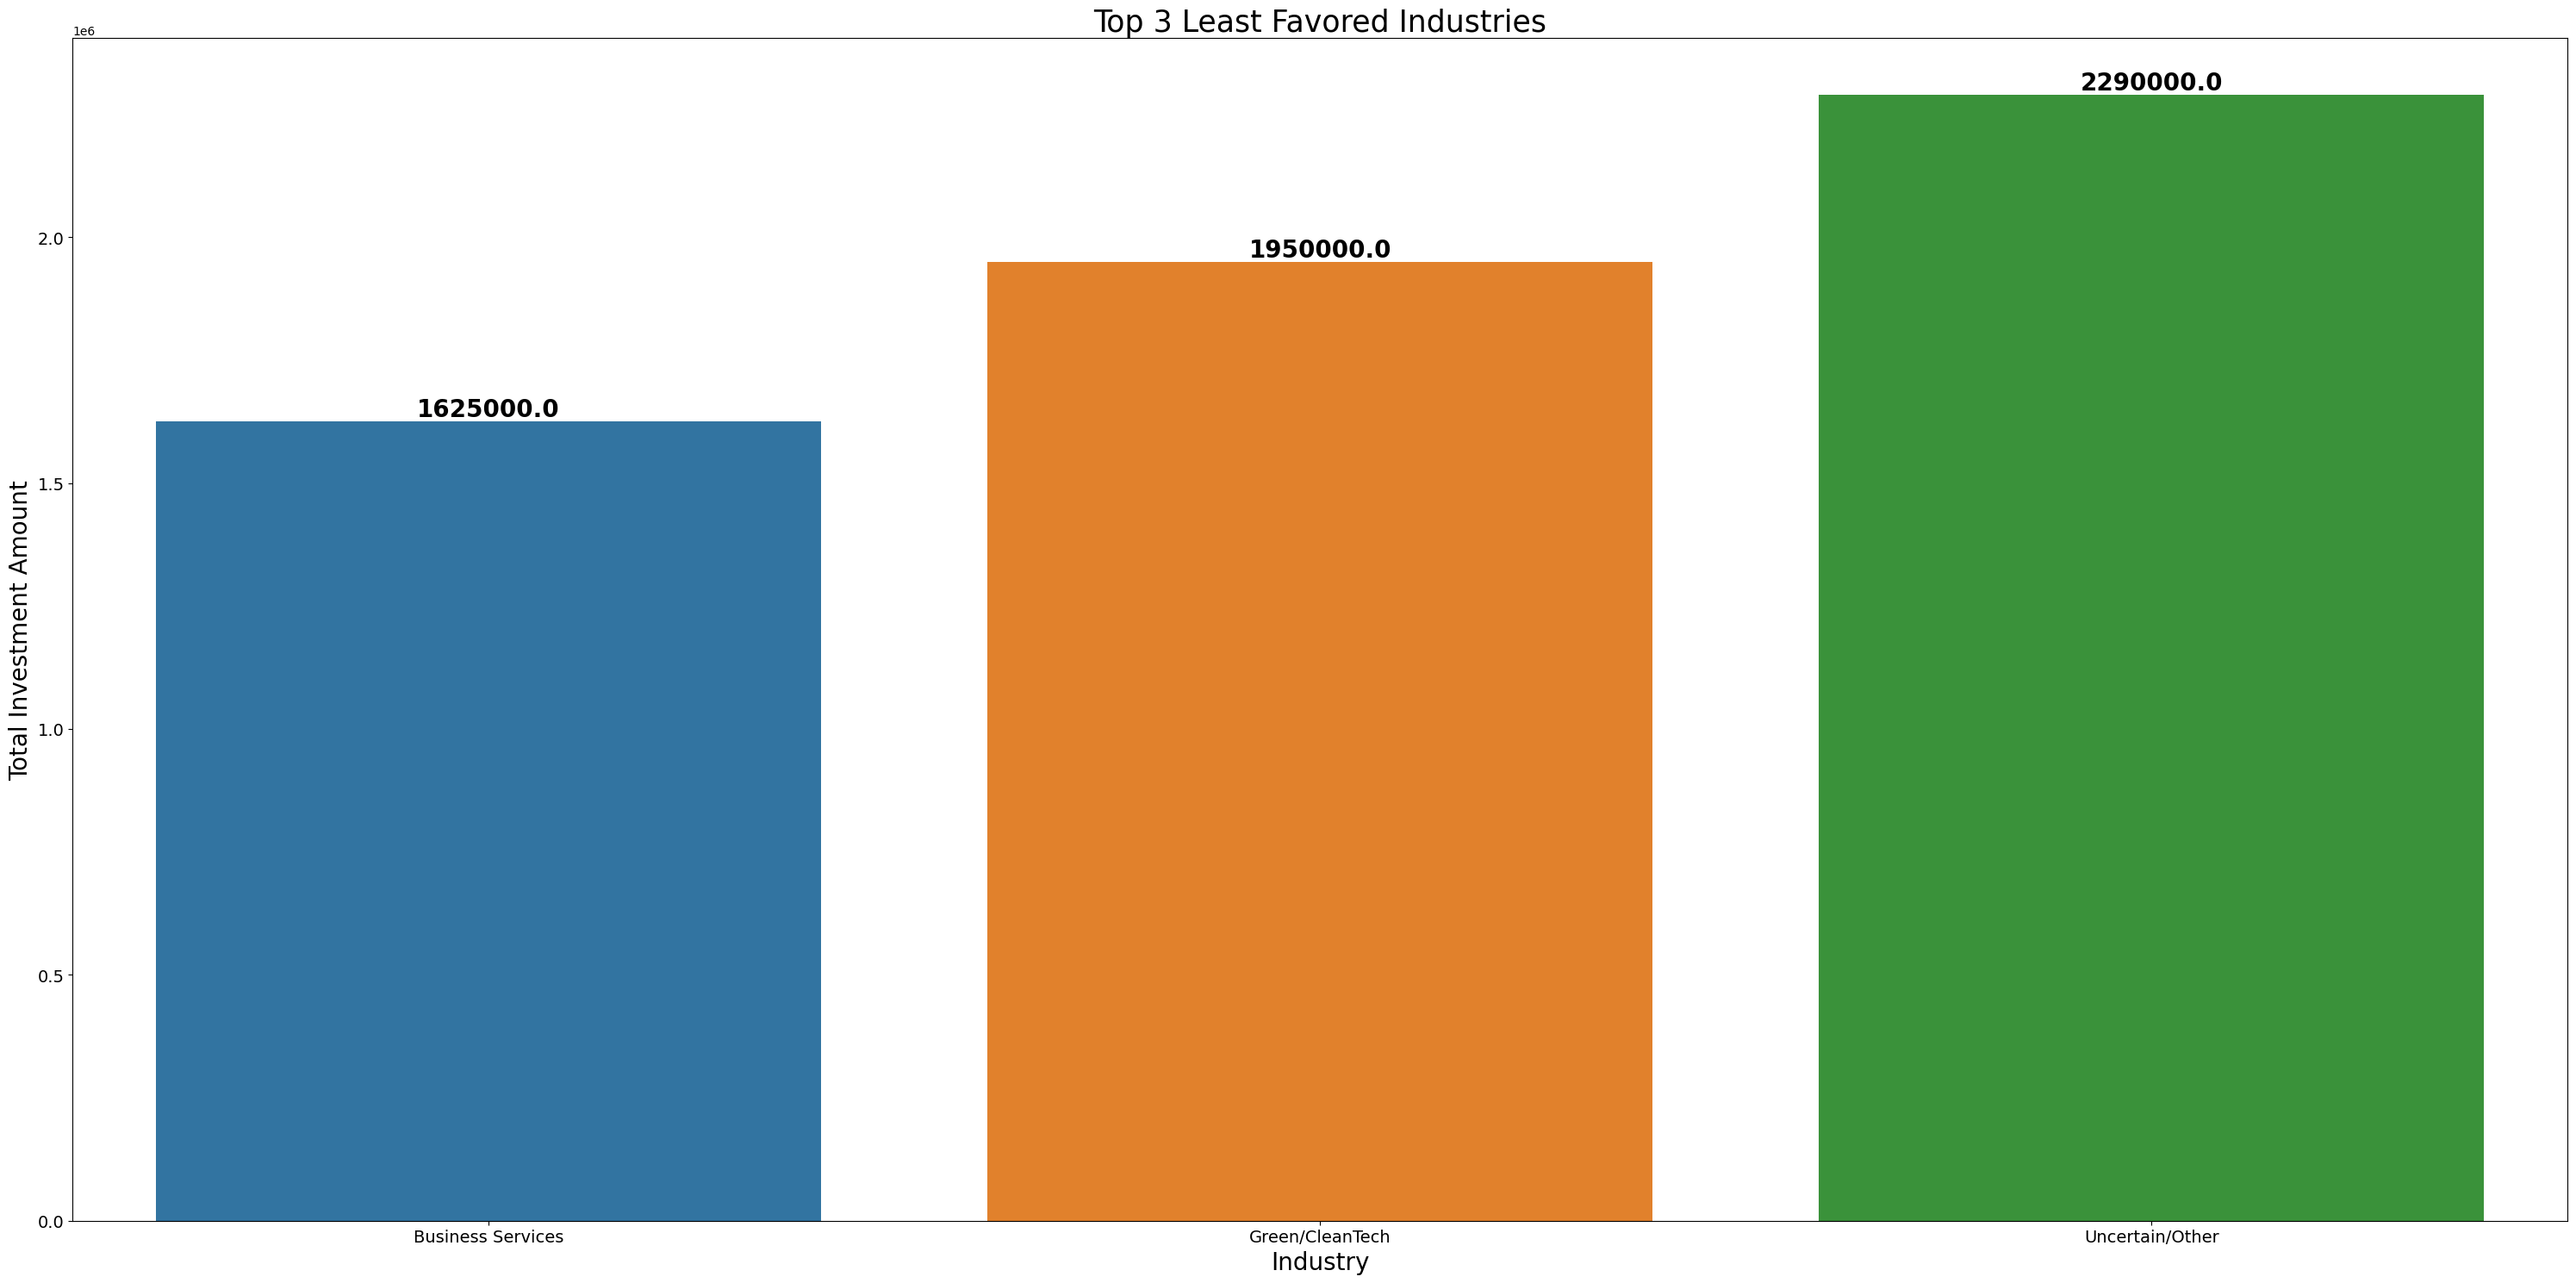

In [16]:
# Question - 15 :- Which are the 3 least favoured industries by the sharks?

Least_Favoured_Industry = Dataset.groupby("Industry")["Total Deal Amount"].sum()
Least_Favoured_Industry = pd.DataFrame(Least_Favoured_Industry)
Least_Favoured_Industry = Least_Favoured_Industry.sort_values(by="Total Deal Amount" , ascending= True)
Least_Favoured_Industry = Least_Favoured_Industry[:3]
print(Least_Favoured_Industry)

plt.figure(figsize=(30, 15))
sns.barplot(data=Least_Favoured_Industry, x=Least_Favoured_Industry.index, y="Total Deal Amount", hue=Least_Favoured_Industry.index)

for i, value in enumerate(Least_Favoured_Industry["Total Deal Amount"]):
    plt.text(i, value, str(value), ha="center", va="bottom", weight="bold", fontsize=20) 

plt.title("Top 3 Least Favored Industries", fontsize=25) 
plt.xlabel("Industry", fontsize=20)
plt.ylabel("Total Investment Amount", fontsize=20)  
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.show()